# Exploratory Data Analysis and Feature Engineering for Inpatient Charges Dataset

In this notebook, we will explore the inpatient charges dataset to gain insights into healthcare pricing, payments, and patient discharges across different providers. Our focus will be on:

1. Conducting an **Exhaustive Exploratory Data Analysis (EDA)** to understand the dataset and find patterns.
2. Creating **10-15 new features**, expressed as ratios or metrics relevant for evaluating healthcare costs and identifying anomalies or potential fraud.
3. Structuring the analysis for different sub-sections, with each section including:
   - A **lead** (what we plan to analyze),
   - The **analysis** itself,
   - A **conclusion** (insight gained from the analysis).


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Loading the inpatient charges dataset
inpatient_data = pd.read_csv('/Users/dave.john.98/Desktop/APAN/Fall 24/Anomaly Detection/Week 5/inpatientCharges.csv')
drg_categories = pd.read_csv('/Users/dave.john.98/Desktop/APAN/Fall 24/Anomaly Detection/Week 5/DRG_Categories.csv')

# Display the first few rows to understand the structure of the data
display(inpatient_data.head())
display(drg_categories.head())

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


,001-019,Pre-MDC
0,020-103,Diseases & Disorders of the Nervous System
1,113-125,Diseases & Disorders of the Eye
2,135-159,"Diseases & Disorders of the Ear, Nose, Mouth &..."
3,163-208,Diseases & Disorders of the Respiratory System
4,212-320,Diseases & Disorders of the Circulatory System


## Verify Column Names and Data Types
We need to verify the column names to ensure consistency throughout the analysis. This includes checking for any leading/trailing spaces, special characters, or incorrect casing that might cause errors.



In [3]:
# Check the columns of the inpatient data
print("Inpatient Data Columns:", inpatient_data.columns)

# Check the columns of the DRG Categories data
print("DRG Categories Data Columns:", drg_categories.columns)


Inpatient Data Columns: Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')
DRG Categories Data Columns: Index(['001-019', 'Pre-MDC'], dtype='object')


In [4]:
# Removing leading and trailing spaces from column names
inpatient_data.columns = inpatient_data.columns.str.strip()

# Display the cleaned column names to verify
print("Cleaned Inpatient Data Columns:", inpatient_data.columns)


Cleaned Inpatient Data Columns: Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')


## Data Cleaning and Conversion of Financial Columns
Here, we will convert the financial columns (`Average Covered Charges`, `Average Total Payments`, `Average Medicare Payments`) to numeric types. This involves removing dollar signs and commas to ensure that we can perform numerical calculations.


In [5]:
# Remove any non-numeric characters from financial columns and convert them to float
financial_columns = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

for column in financial_columns:
    inpatient_data[column] = inpatient_data[column].replace('[\$,]', '', regex=True).astype(float)

# Display a sample of the cleaned dataset to verify the changes
display(inpatient_data.head())


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [6]:
inpatient_data.info()
drg_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

## Initial Exploratory Data Analysis
In this section, we will conduct an initial exploratory data analysis to understand the distribution of key variables such as `Total Discharges`, `Average Covered Charges`, `Average Total Payments`, and `Average Medicare Payments`. We will use visualizations and descriptive statistics to identify patterns, trends, or potential anomalies.


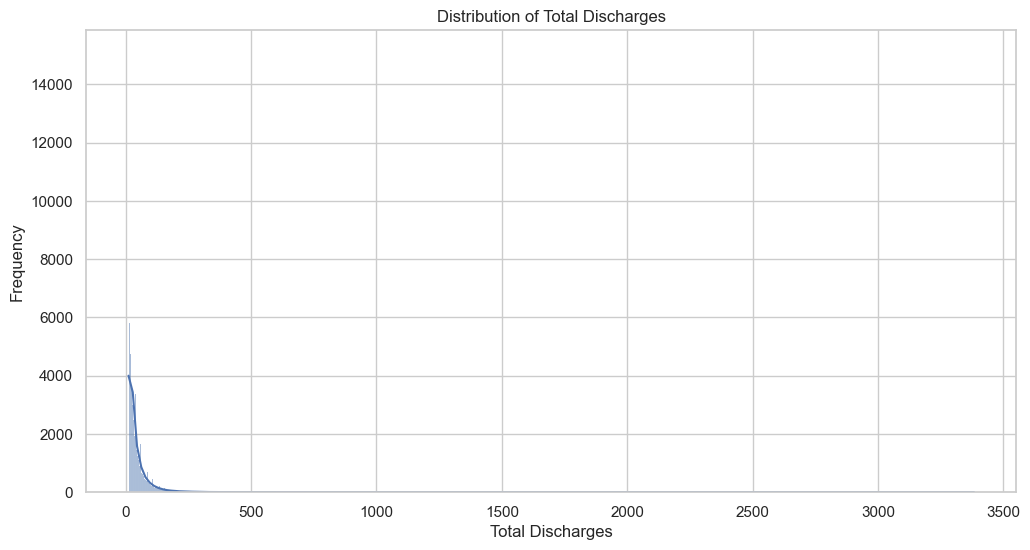

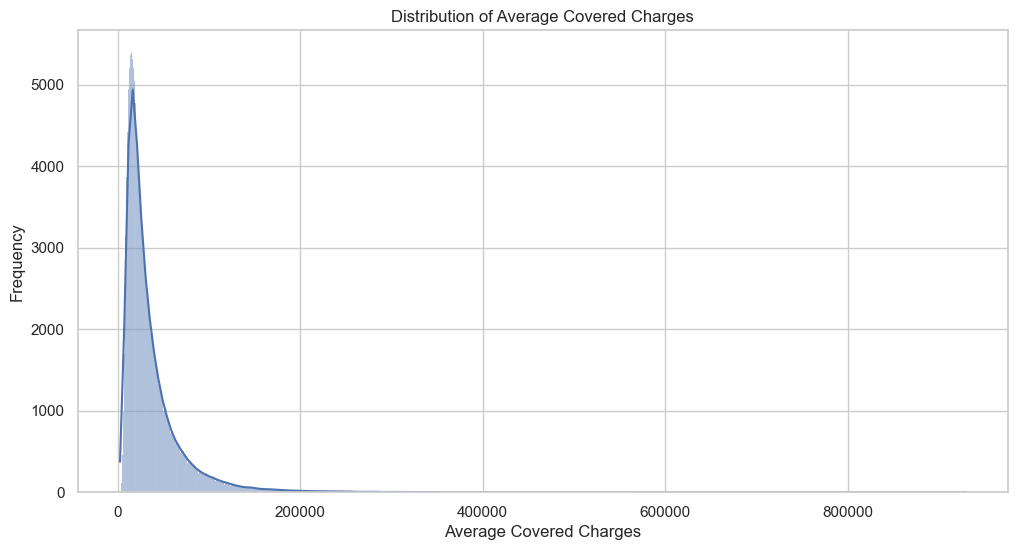

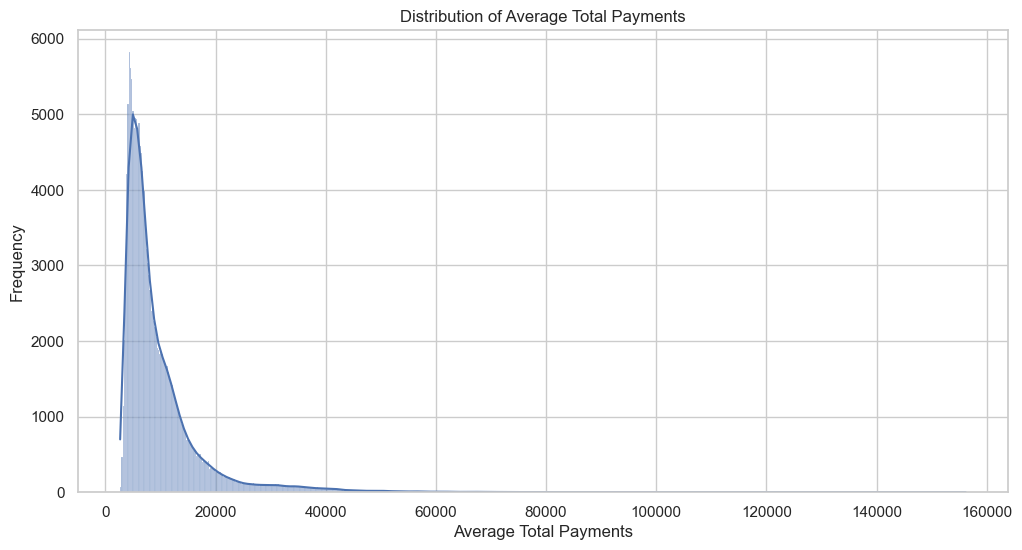

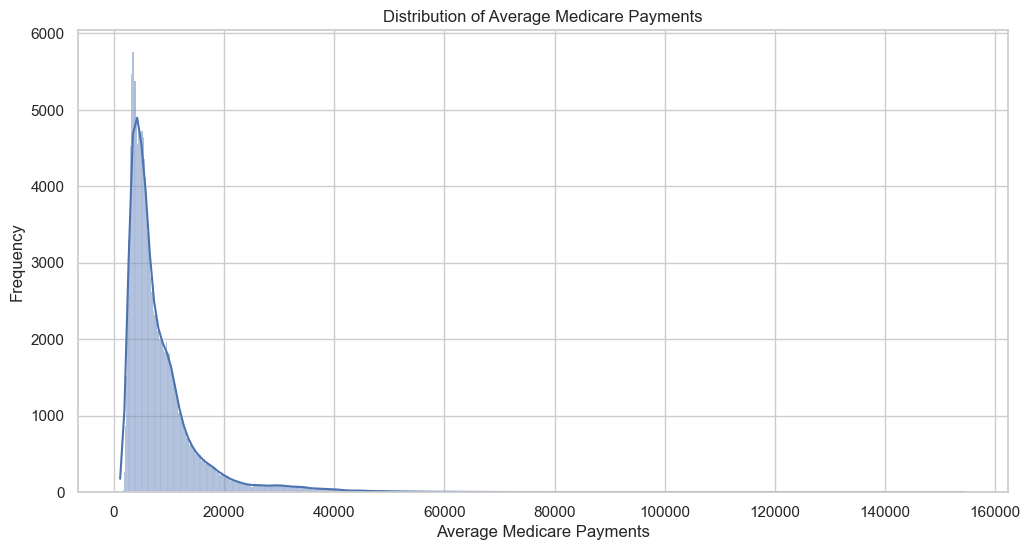

In [7]:
# Setting plot style for better visualization
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Plotting histograms to visualize the distribution of numerical variables
numerical_columns = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

for column in numerical_columns:
    sns.histplot(data=inpatient_data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### Initial Observations

#### Total Discharges
- The distribution is highly **skewed to the right**, with most discharges clustering at relatively low values (less than 100). A few hospitals have significantly higher discharge numbers, indicating the presence of **outliers**.
- This suggests that the majority of hospitals have moderate patient volumes, while only a few handle very high volumes.

#### Average Covered Charges
- Similar to Total Discharges, **Average Covered Charges** show a **right-skewed distribution** with most values clustered at lower ranges (below $200,000).
- There are a small number of cases where covered charges are extremely high, suggesting possible **cost discrepancies** or **high-priced services** offered by certain providers.

#### Average Total Payments
- The distribution of **Average Total Payments** also exhibits **right-skewed behavior**, with most values under $50,000.
- The large number of low-value payments could reflect typical procedures covered by Medicare, while higher values might indicate specialized or high-cost treatments.

#### Average Medicare Payments
- The **Average Medicare Payments** distribution is very similar to the **Average Total Payments** distribution, but slightly lower in value.
- This reflects the fact that Medicare generally pays only a portion of the total covered charges. **Outliers** here could indicate anomalies or high-cost treatments.


In [8]:
# Generating summary statistics for numerical columns
display(inpatient_data.describe())


,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.954224,9707.473804,8494.490964
std,151563.671767,27854.323080,51.104042,35065.365931,7664.642598,7309.467261
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.900000
25%,110092.000000,27261.000000,17.000000,15947.160000,5234.500000,4192.350000
50%,250007.000000,44309.000000,27.000000,25245.820000,7214.100000,6158.460000
75%,380075.000000,72901.000000,49.000000,43232.590000,11286.400000,10056.880000
max,670077.000000,99835.000000,3383.000000,929118.900000,156158.180000,154620.810000


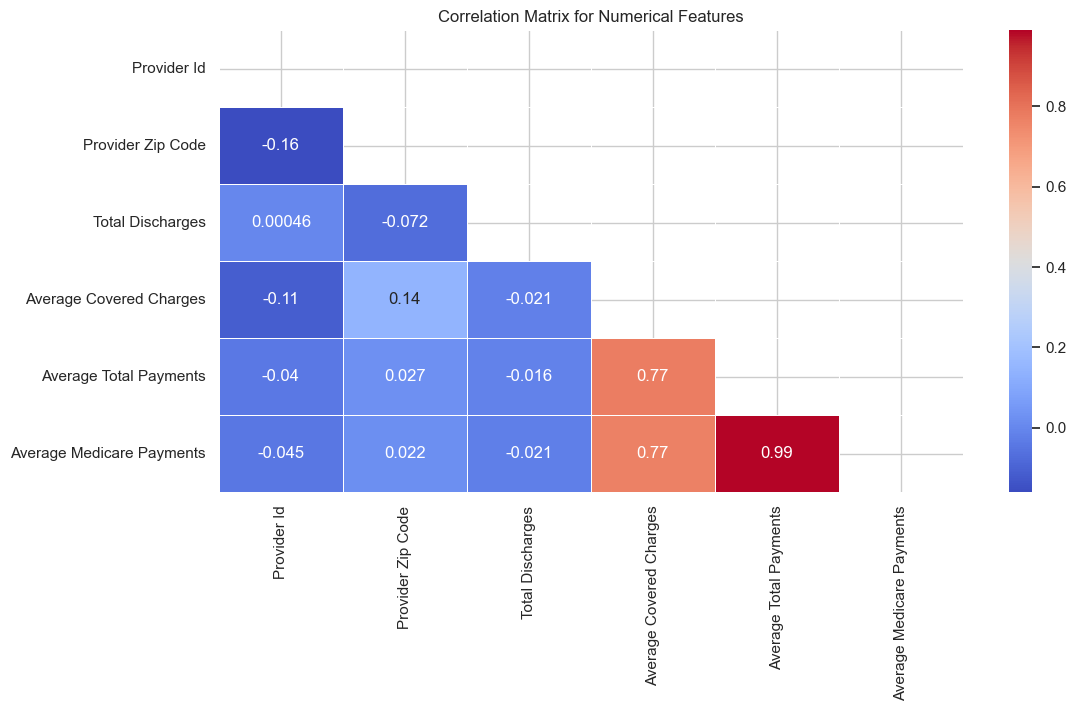

In [9]:
# Selecting only the numerical columns for correlation analysis
numerical_data = inpatient_data.select_dtypes(include=['number'])

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(numerical_data.corr(), dtype=bool))

# Plot the correlation heatmap
sns.heatmap(numerical_data.corr(), mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()



### Insights from Correlation Analysis

The correlation matrix for numerical features provides the following insights:

1. **Average Total Payments and Average Medicare Payments**:
   - These two variables are **highly correlated** with a correlation value of **0.99**. This indicates that Medicare payments account for almost all of the total payments in most cases. It is likely that these two variables are capturing similar information, and thus, one may be redundant for predictive modeling purposes.

2. **Average Covered Charges and Average Total Payments**:
   - There is a **moderate positive correlation** (**0.77**) between `Average Covered Charges` and `Average Total Payments`. This suggests that higher covered charges tend to be associated with higher total payments, which is intuitive as more expensive procedures generally require higher payments.

3. **Provider Zip Code and Average Covered Charges**:
   - The correlation between `Provider Zip Code` and `Average Covered Charges` is **0.14**, indicating a **weak positive correlation**. This implies that there might be slight regional variations in charges, but it is not a strong factor.

4. **Other Variables**:
   - The correlations between `Total Discharges` and any other numerical features are close to **0**, indicating **no significant linear relationship** between `Total Discharges` and other payment or charge variables. This suggests that the number of discharges may not be directly influenced by the payment amounts or charges in a simple linear sense.

5. **Provider Id and Provider Zip Code**:
   - There is a **negative correlation** (**-0.16**) between `Provider Id` and `Provider Zip Code`. This relationship does not hold much analytical meaning since these columns are identifiers and do not have a direct numeric significance. 

#### Summary
- The **high correlation** between `Average Total Payments` and `Average Medicare Payments` suggests that we might want to drop one of these variables for feature engineering to avoid redundancy.
- The weak correlations between `Provider Zip Code` and financial variables suggest slight regional differences in charges.
- No significant correlations were found with `Total Discharges`, indicating it may need further exploration with nonlinear relationships or other forms of analysis.



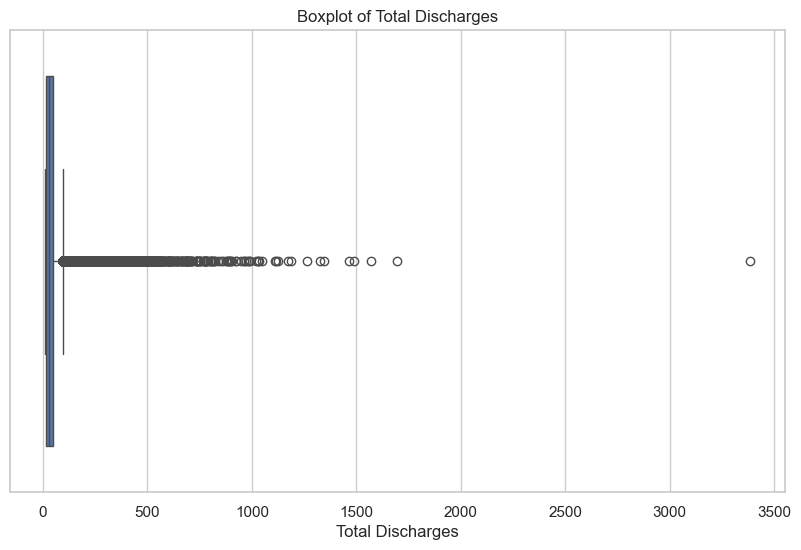

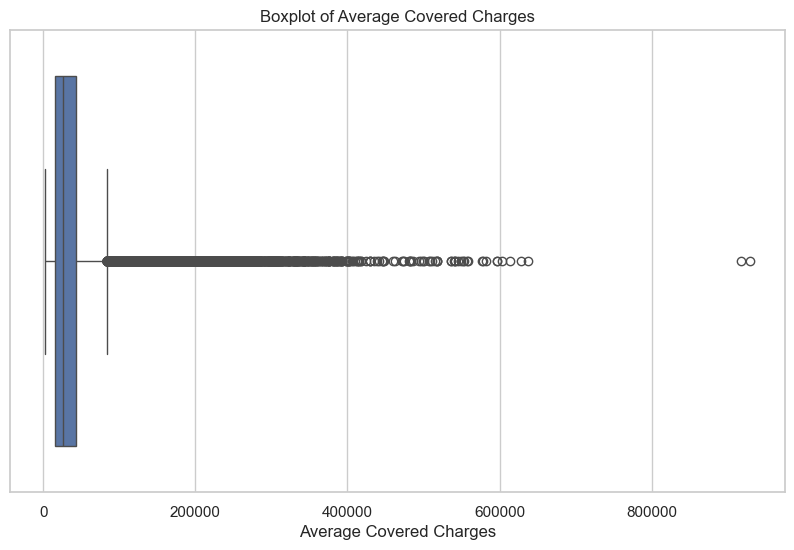

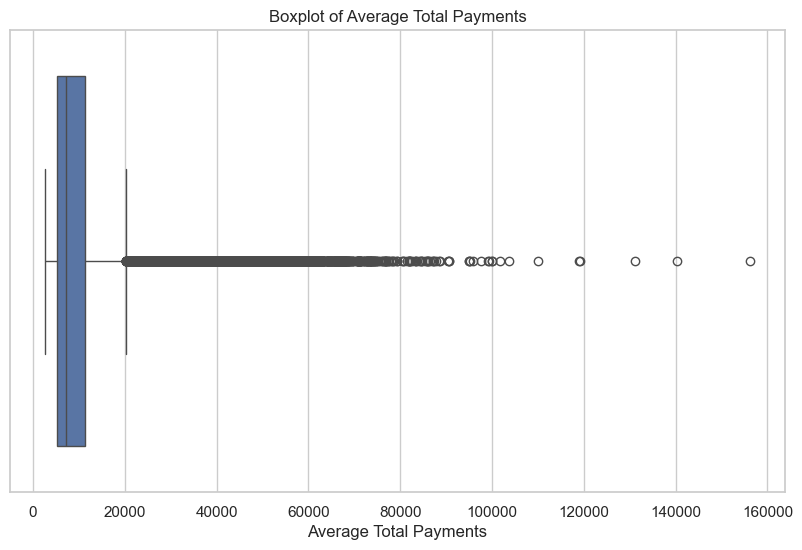

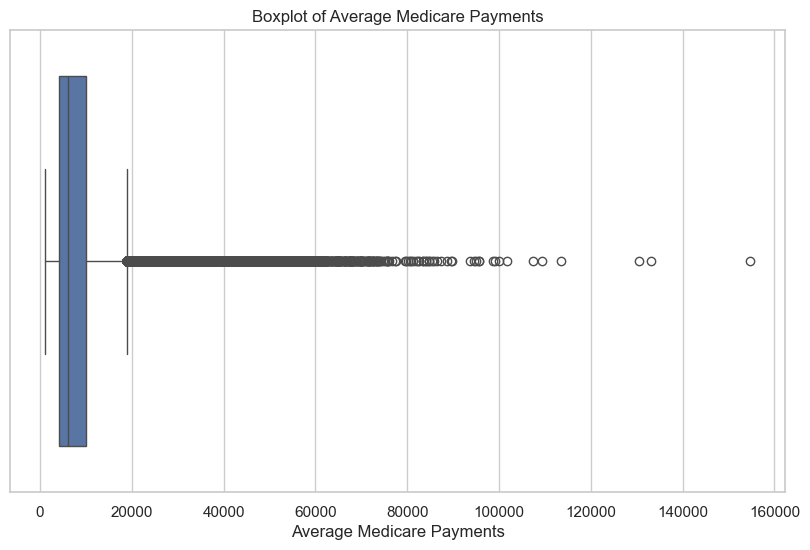

In [10]:
# Boxplots for detecting outliers in numerical features
numerical_columns = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=inpatient_data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


### Insights from Outlier Detection Using Boxplots

#### Total Discharges
- The boxplot for `Total Discharges` indicates a **large number of outliers** above the upper whisker, with discharge values extending beyond **500** and reaching up to **3,383**.
- The majority of values are tightly clustered below **100**, suggesting that most hospitals have moderate patient discharge counts, while a few handle a very high volume, likely indicating specialized or larger hospitals.

#### Average Covered Charges
- The boxplot for `Average Covered Charges` also reveals numerous **outliers** beyond the upper whisker, with covered charges extending up to **$929,118.90**.
- Most of the values are clustered below **$50,000**, while the extreme outliers suggest there are specific services or hospitals with exceptionally high charges.

#### Average Total Payments
- The boxplot for `Average Total Payments` shows a significant number of **outliers** extending beyond **$40,000**.
- The majority of hospitals have average payments below **$10,000**, indicating that most services provided by these hospitals are not as costly. However, there are some providers with extremely high payments that may represent specialized or high-cost procedures.

#### Average Medicare Payments
- Similar to `Average Total Payments`, the boxplot for `Average Medicare Payments` shows **outliers** beyond **$40,000** and extending up to **$154,620.81**.
- The large number of low payments, contrasted with the relatively few extreme values, suggests variability in the procedures covered by Medicare and potential differences in hospital billing practices.

#### Summary of Outliers
- The presence of numerous outliers across `Total Discharges`, `Average Covered Charges`, `Average Total Payments`, and `Average Medicare Payments` suggests **high variability** among hospitals. 
- The **outliers** could represent hospitals that serve specialized cases, more complex procedures, or potentially **fraudulent billing**.
- For feature engineering, we should consider creating features to capture **anomalous behavior** and possibly **normalize** these variables to reduce the influence of extreme values.



### EDA 1. Unique DRG Analysis
In this section, we will explore the unique Diagnosis-Related Groups (DRGs) in the dataset to understand the common conditions/diseases represented. We will also examine the distinction between DRGs with complications or comorbidities (CC/MCC) versus those without.


Number of unique DRG Definitions: 100


DRG Definition
194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC    2899
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                    2812
603 - CELLULITIS W/O MCC                                                    2807
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    2750
191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC                            2720
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC                           2713
Name: count, dtype: int64

/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/2090777343.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drgs.values, y=top_drgs.index, palette='viridis')


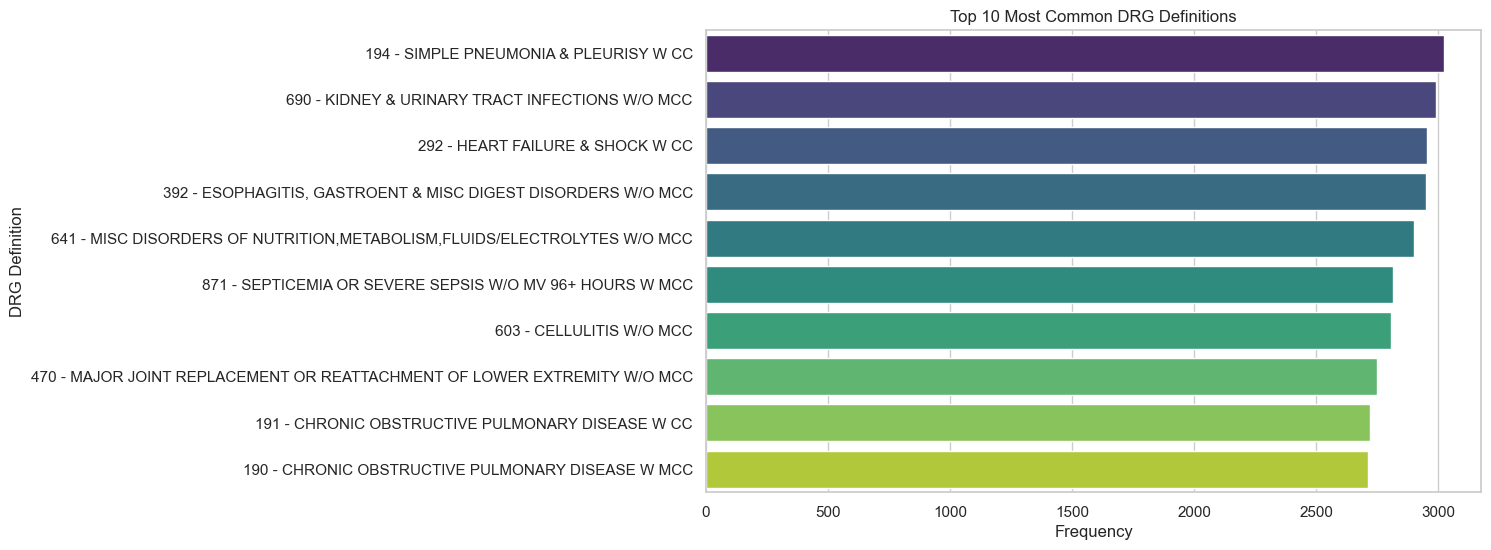

In [11]:
# Number of unique DRG definitions
unique_drgs = inpatient_data['DRG Definition'].nunique()

# Most common DRGs
top_drgs = inpatient_data['DRG Definition'].value_counts().head(10)

# Display unique count and top DRGs
print(f"Number of unique DRG Definitions: {unique_drgs}")
display(top_drgs)

# Visualizing the top 10 most common DRGs
plt.figure(figsize=(10, 6))
sns.barplot(x=top_drgs.values, y=top_drgs.index, palette='viridis')
plt.title('Top 10 Most Common DRG Definitions')
plt.xlabel('Frequency')
plt.ylabel('DRG Definition')
plt.show()


- **Number of Unique DRG Definitions**: The dataset contains a total of 100 unique DRG Definitions, indicating a diverse set of medical conditions represented in the dataset.
- **Most Common DRGs**:
  - The most common DRG in the dataset is **"194 - Simple Pneumonia & Pleurisy W CC"**, with a frequency of **3,023**. This suggests that pneumonia and pleurisy, especially with complications or comorbidities, are prevalent conditions in this dataset.
  - **"Kidney & Urinary Tract Infections W/O MCC"** (2,989 occurrences) and **"Heart Failure & Shock W CC"** (2,953 occurrences) are also among the most frequent DRGs, which reflects the high occurrence of these conditions in the inpatient dataset.
  - Other frequently appearing DRGs include **gastrointestinal disorders**, **nutritional/metabolic issues**, and **severe sepsis**, indicating a common set of medical conditions leading to inpatient admissions.

The analysis of DRGs provides insights into the common medical conditions and helps identify focus areas for further cost analysis and feature engineering. The high frequency of conditions such as pneumonia, heart failure, and infections indicates a significant healthcare burden associated with these illnesses.


### EDA 2. Analysis of Providers with Highest Total Discharges
Next, we will analyze the providers (hospitals) that have the highest number of total discharges to understand which facilities handle the most inpatient cases and to identify any regional patterns.


Provider Name
GOOD SAMARITAN HOSPITAL                  27592
FLORIDA HOSPITAL                         25828
BAPTIST MEDICAL CENTER                   18208
METHODIST HOSPITAL                       17638
NEW YORK-PRESBYTERIAN HOSPITAL           16834
ST JOSEPH MEDICAL CENTER                 15843
COMMUNITY MEDICAL CENTER                 14797
CHRISTIANA CARE HEALTH SERVICES, INC.    14542
WILLIAM BEAUMONT HOSPITAL                14469
SOUTHCOAST HOSPITAL GROUP, INC           14202
Name: Total Discharges, dtype: int64

/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/3466499099.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=provider_discharge_sum.values, y=provider_discharge_sum.index, palette='plasma')


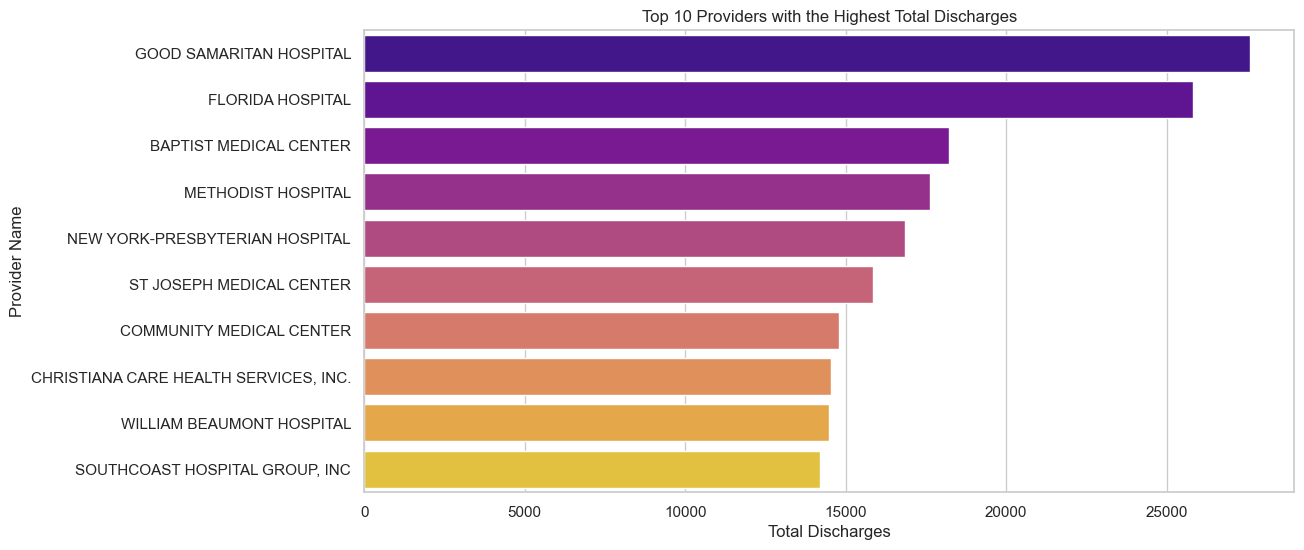

In [12]:
# Sum of discharges by provider
provider_discharge_sum = inpatient_data.groupby('Provider Name')['Total Discharges'].sum().sort_values(ascending=False).head(10)

# Displaying the top 10 providers with highest discharges
display(provider_discharge_sum)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=provider_discharge_sum.values, y=provider_discharge_sum.index, palette='plasma')
plt.title('Top 10 Providers with the Highest Total Discharges')
plt.xlabel('Total Discharges')
plt.ylabel('Provider Name')
plt.show()


- **Top Providers**:
  - **Good Samaritan Hospital** has the highest number of total discharges, reaching **27,592**, indicating a significant volume of inpatient care provided.
  - **Florida Hospital** follows with **25,828** total discharges, highlighting its role in managing a large number of patients.
  - **Baptist Medical Center** (18,208 discharges) and **Methodist Hospital** (17,638 discharges) are also among the top facilities with high patient volumes.

- **Regional Patterns**:
  - The hospitals with the highest discharges appear to be spread across different regions, indicating that a few large healthcare facilities manage a considerable patient load in various locations.
  - **New York-Presbyterian Hospital** and **Florida Hospital** stand out as facilities managing substantial inpatient volumes, potentially pointing to the size of the population served and their capacity to handle critical medical cases.

The high number of discharges in these facilities suggests that they are key players in providing healthcare, likely equipped with the resources needed to cater to a large number of patients. Further analysis can be conducted to understand their specialties and why they cater to such high volumes.


### EDA 3. Analysis of Correlation Between DRG Definitions and States
In this step, we will analyze the relationship between the types of procedures (DRG definitions) and the states where they are performed. This can help identify patterns in healthcare services provided regionally.


/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/3206831382.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_data.values, y=top_drgs_codes, ax=axes[i], palette='viridis')
/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/3206831382.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_data.values, y=top_drgs_codes, ax=axes[i], palette='viridis')
/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/3206831382.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_data.values,

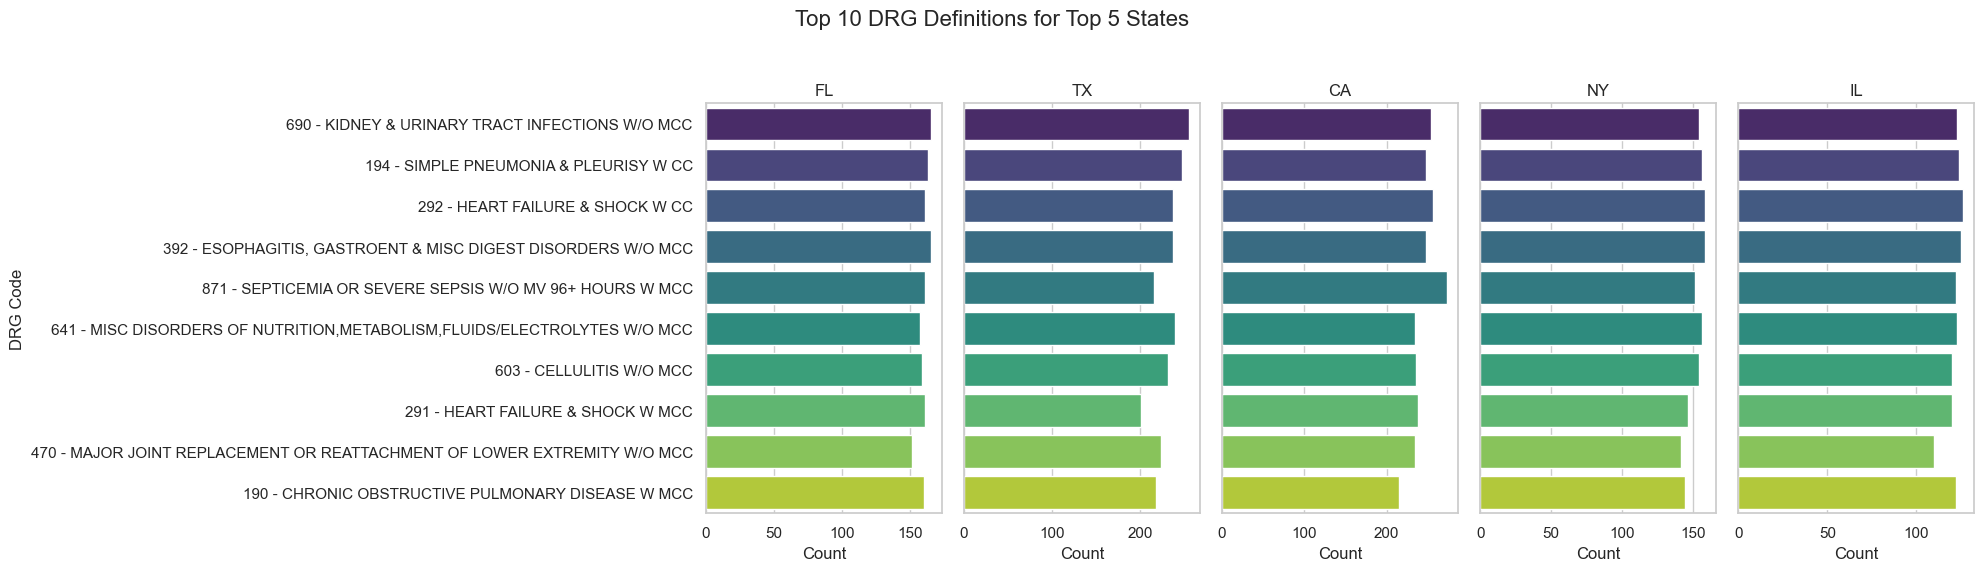

In [13]:
# Select the top 5 states with the highest total discharges
top_states = inpatient_data.groupby('Provider State')['Total Discharges'].sum().sort_values(ascending=False).head(5).index

# Filter the inpatient data to include only these top states
filtered_data = inpatient_data[inpatient_data['Provider State'].isin(top_states)]

# Grouping by the selected states and DRG Definitions
drg_state_counts_filtered = filtered_data.groupby(['Provider State', 'DRG Definition']).size().unstack(fill_value=0)

# Visualizing the heatmap for top 10 DRG definitions across top 5 states
top_drgs_filtered = drg_state_counts_filtered.sum().sort_values(ascending=False).head(10).index


# Subset data for the top 5 states
top_drgs_codes = top_drgs_filtered.tolist()  # Corrected: Access the index values as a list directly

# Set up subplots: a grid of 5 plots (one for each state)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
fig.suptitle('Top 10 DRG Definitions for Top 5 States', fontsize=16)

# Iterate over each state and plot a bar chart
for i, state in enumerate(top_states):
    # Extract the data for the current state, focusing on the top DRGs
    state_data = drg_state_counts_filtered.loc[state, top_drgs_filtered]
    
    # Plot the bar chart
    sns.barplot(x=state_data.values, y=top_drgs_codes, ax=axes[i], palette='viridis')
    axes[i].set_title(state)
    axes[i].set_xlabel('Count')
    
    # Only add y-axis labels to the first subplot for neatness
    if i == 0:
        axes[i].set_ylabel('DRG Code')
    else:
        axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

1. **Most Common Diagnoses/Procedures**:
   - **Kidney & Urinary Tract Infections without MCC (DRG 690)**, **Simple Pneumonia & Pleurisy with CC (DRG 194)**, and **Heart Failure & Shock with CC (DRG 292)** are consistently ranked as the top 3 most common DRGs across all states. This reflects national health trends and highlights the most frequent medical conditions treated in these regions.

2. **State-Specific Differences**:
   - There is some variability in the order and frequency of the DRG codes. For example, California shows the highest occurrences for **Kidney & Urinary Tract Infections without MCC**, while Texas also has a higher count of these cases compared to other states.
   - **Septicemia or Severe Sepsis without MV 96+ Hours with MCC (DRG 871)** shows higher variability in ranking, which could suggest regional differences in how conditions like sepsis are reported and treated.

3. **Regional Implications**:
   - The consistency of DRG codes across these states suggests a commonality in the types of medical conditions that hospitals face, likely influenced by broader national health issues.
   - Differences in the exact counts indicate that regional factors, such as state demographics or healthcare practices, might impact the frequency of certain conditions.

Overall, the DRG definitions provide insight into the most prevalent medical conditions being treated across major states, which could help focus attention on resource allocation and regional healthcare strategies.


### EDA 4. What is the distribution of total discharges by provider type, and how does it vary?

To explore the distribution of total discharges, we first need to group the data by the type of healthcare provider and calculate the sum of discharges for each type. Since the dataset doesn't explicitly provide a "Provider Type" column, we'll categorize the providers based on their names.

Let's categorize the provider names into the following groups:

- **Hospitals**: Providers that have "Hospital" in their name.
- **Medical Centers**: Providers that have "Medical Center" in their name.
- **Health Services**: Providers that have "Health Services" or similar phrases.
- **Others**: Providers that do not fall into the above categories.

Using these categories, we can group the providers and calculate the total discharges for each type.


In [14]:
# Categorize providers into 'Hospital', 'Medical Center', or 'Health Services' based on their name
provider_type = []

for name in inpatient_data['Provider Name']:
    if 'HOSPITAL' in name.upper():
        provider_type.append('Hospital')
    elif 'MEDICAL CENTER' in name.upper():
        provider_type.append('Medical Center')
    elif 'HEALTH SERVICES' in name.upper() or 'HEALTH' in name.upper():
        provider_type.append('Health Services')
    else:
        provider_type.append('Other')

# Add the categorized provider type to the dataframe
inpatient_data['Provider Type'] = provider_type

# Aggregate total discharges by provider type
provider_discharge_summary = inpatient_data.groupby('Provider Type')['Total Discharges'].sum().reset_index()

# Display the summary
display(provider_discharge_summary)


,Provider Type,Total Discharges
0,Health Services,450741
1,Hospital,3660754
2,Medical Center,2562299
3,Other,301524


/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/3858670373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Discharges', y='Provider Type', data=provider_discharge_summary, palette='viridis')


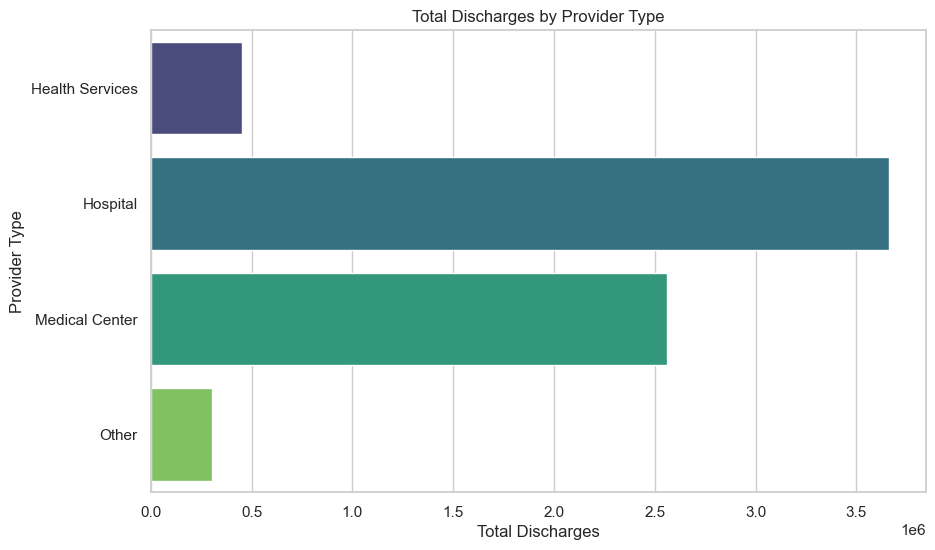

In [15]:
# Barplot of total discharges by provider type
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Discharges', y='Provider Type', data=provider_discharge_summary, palette='viridis')
plt.xlabel('Total Discharges')
plt.ylabel('Provider Type')
plt.title('Total Discharges by Provider Type')
plt.show()


#### Takeaways for Distribution of Total Discharges by Provider Type

- **Hospitals** account for the majority of total discharges, with over 3.6 million discharges. This suggests that hospitals play a central role in providing healthcare services compared to other provider types.
- **Medical Centers** also have a substantial number of discharges, totaling around 2.56 million. This highlights their significant contribution to healthcare, particularly in specialized services.
- **Health Services** have a relatively lower number of discharges compared to hospitals and medical centers, indicating that these providers may be more focused on specific types of care or niche services.
- **Other** providers, which could include clinics or smaller healthcare facilities that do not fit into the above categories, have a comparatively smaller volume of discharges, at around 300,000. This indicates that their role in providing inpatient services is more limited.

The bar plot further visualizes these differences, illustrating that **Hospitals** and **Medical Centers** dominate in the volume of discharges, while **Health Services** and **Other** categories have smaller contributions.


### EDA 5. How does the distribution of average covered charges vary across different DRG definitions?

To answer this question, we will visualize how average covered charges vary for different DRG (Diagnosis-Related Group) definitions. This will help us understand the distribution of costs for different medical conditions.

#### Steps:
1. Calculate the average covered charges for each DRG definition.
2. Plot the average covered charges for the top 10 most common DRG definitions.

Let's begin. I'll provide the code and visualization, and once you run it, we can continue with the markdown-formatted takeaways.


In [16]:
# Group data by DRG Definition and calculate average covered charges
average_charges_per_drg = inpatient_data.groupby('DRG Definition')['Average Covered Charges'].mean().sort_values(ascending=False)

# Display the top 10 DRG definitions with the highest average covered charges
top_10_drg_average_charges = average_charges_per_drg.head(10)
display(top_10_drg_average_charges)


DRG Definition
870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS                              163227.331725
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS             143428.051066
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC                  139186.350937
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC                              135330.939966
246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W MCC OR 4+ VESSELS/STENTS     96348.806707
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC                                    95568.276246
238 - MAJOR CARDIOVASC PROCEDURES W/O MCC                                      85010.449213
252 - OTHER VASCULAR PROCEDURES W MCC                                          83502.956898
469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W MCC         81704.226749
480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT W MCC                          75339.614435
Name: Average Covered Charges, dtype: float64

/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/1628974516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_drg_average_charges.values, y=top_10_drg_average_charges.index, palette='magma')


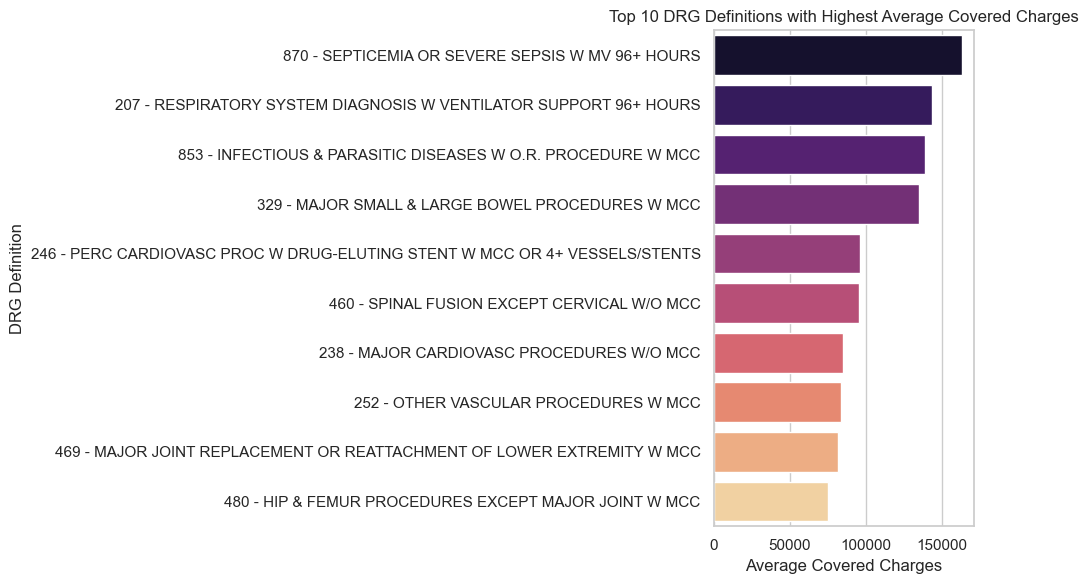

In [17]:
# Plotting the average covered charges for the top 10 DRG definitions
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_drg_average_charges.values, y=top_10_drg_average_charges.index, palette='magma')
plt.xlabel('Average Covered Charges')
plt.ylabel('DRG Definition')
plt.title('Top 10 DRG Definitions with Highest Average Covered Charges')
plt.tight_layout()
plt.show()


### Takeaways for Distribution of Average Covered Charges by DRG Definition

1. **Highest Charges Associated with Critical Care**:
   - The DRG "Septicemia or Severe Sepsis with MV 96+ Hours" (DRG Code 870) has the highest average covered charges of approximately $163,227. This is likely due to the prolonged and intensive care needed for patients with sepsis, often involving extended hospital stays and complex treatment.

2. **High Costs for Respiratory and Infectious Diseases**:
   - Respiratory system diagnosis with ventilator support (DRG Code 207) and infectious & parasitic diseases with MCC (DRG Code 853) also have high average charges, indicating that cases involving mechanical ventilation or severe infections tend to require significant medical resources and intervention.

3. **Cardiovascular and Orthopedic Procedures**:
   - The list also includes cardiovascular procedures (e.g., DRG Codes 246 and 238) and orthopedic procedures (e.g., DRG Code 460 and 469), which are typically associated with higher costs due to the need for specialized surgeries, implants, and extended recovery periods.

4. **Variation in Charges Among DRGs**:
   - The average covered charges vary significantly across DRG definitions, with the top 10 DRGs ranging from approximately $75,339 to $163,227. This highlights that certain medical conditions and treatments are significantly more resource-intensive than others, contributing to higher healthcare costs.


## Feature Engineering
In this section, we will create several features based on our exploratory data analysis. These features will help in identifying patterns, anomalies, and potential inefficiencies in the dataset.


### Feature 1: Medicare Payment-to-Covered Charge Ratios Analysis

In this feature, we aim to analyze providers' Medicare Payment-to-Covered Charge ratios across the dataset to identify outliers on both ends. Typically, Medicare payments should have some consistency in relation to covered charges for similar treatments or procedures within the same DRG definition. Both unusually high and low payment-to-charge ratios may indicate potential discrepancies or anomalies worth investigating.

**Steps:**

1. **Calculate Payment-to-Covered Charge Ratios**: Compute the ratio of Medicare payments to the covered charges for each provider.

2. **Set Benchmark Thresholds**: Use the 10th percentile and 90th percentile as benchmarks to identify unusually low and high ratios.

3. **Visualize the Distribution of Ratios**: Plot the distribution of payment-to-charge ratios and mark the 10th and 90th percentile thresholds to identify outliers.

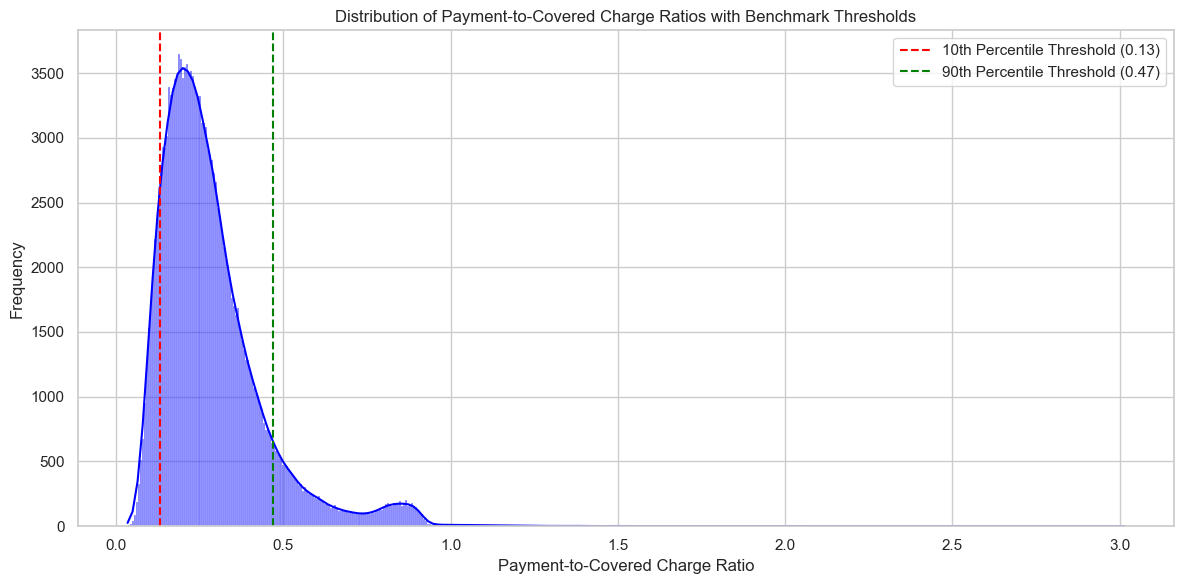

In [18]:
# Step 1: Calculate Payment-to-Covered Charge Ratios
inpatient_data['Payment_to_Charge_Ratio'] = inpatient_data['Average Medicare Payments'] / inpatient_data['Average Covered Charges']

# Step 2: Set Benchmark Thresholds (10th and 90th percentiles)
low_payment_to_charge_threshold = inpatient_data['Payment_to_Charge_Ratio'].quantile(0.1)
high_payment_to_charge_threshold = inpatient_data['Payment_to_Charge_Ratio'].quantile(0.9)

# Step 3: Visualize the Distribution of Payment-to-Covered Charge Ratios
plt.figure(figsize=(12, 6))
sns.histplot(data=inpatient_data, x='Payment_to_Charge_Ratio', kde=True, color='blue')
plt.axvline(x=low_payment_to_charge_threshold, color='red', linestyle='--', label=f'10th Percentile Threshold ({low_payment_to_charge_threshold:.2f})')
plt.axvline(x=high_payment_to_charge_threshold, color='green', linestyle='--', label=f'90th Percentile Threshold ({high_payment_to_charge_threshold:.2f})')
plt.title('Distribution of Payment-to-Covered Charge Ratios with Benchmark Thresholds')
plt.xlabel('Payment-to-Covered Charge Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

#### Payment-to-Charge Ratio Takeaways

- The distribution of Payment-to-Covered Charge Ratios is heavily skewed towards lower values, indicating that most providers have a relatively low ratio of Medicare payments to covered charges.
- The **10th percentile threshold** (red dashed line) is at **0.13**, which means that ratios below this value could represent unusually low payment scenarios, potentially suggesting underpayment or incorrect billing practices.
- The **90th percentile threshold** (green dashed line) is at **0.47**, indicating that ratios above this value may represent unusually high payments compared to covered charges, suggesting overpayment or potential fraud.
- Both ends of the spectrum are important for identifying irregularities. Providers with ratios significantly outside the range between the 10th and 90th percentiles warrant further investigation to ensure compliance and proper billing practices.


### Feature 2: Discharges per Dollar Spent

The **Discharges per Dollar Spent** feature is calculated as the ratio of `Total Discharges` to `Average Total Payments`. This feature helps evaluate the efficiency of hospitals in terms of patient discharges relative to the amount of money spent. Higher values indicate that hospitals are managing to discharge more patients with fewer resources, potentially indicating better efficiency.

**Benchmarking**:
- We use the **5th percentile** to benchmark low `Discharges per Dollar Spent`.
- Hospitals with ratios **below the 5th percentile** will be flagged, as they may indicate inefficiencies in resource usage or unusually high costs per discharge.


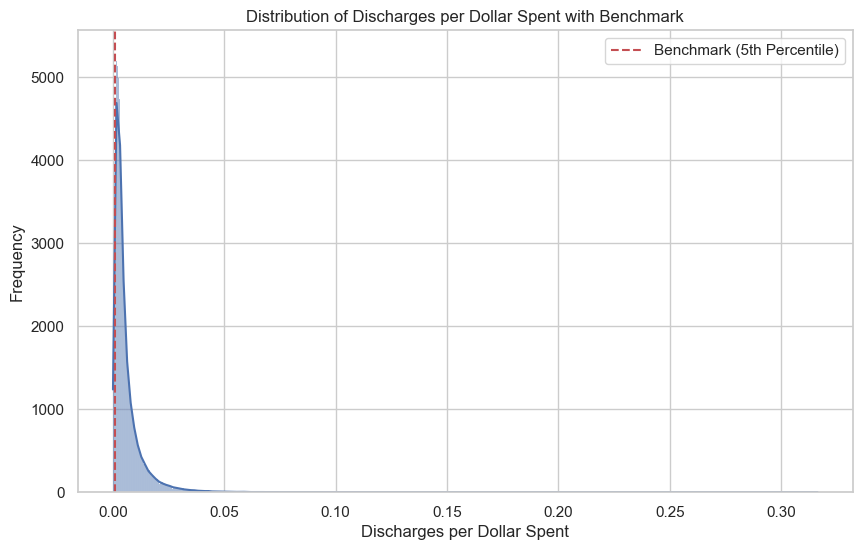

In [19]:
# Creating Discharges per Dollar Spent
inpatient_data['Discharges_per_Dollar'] = inpatient_data['Total Discharges'] / inpatient_data['Average Total Payments']

# Setting benchmark for low Discharges per Dollar Spent (below 5th percentile)
discharges_per_dollar_threshold = inpatient_data['Discharges_per_Dollar'].quantile(0.05)
inpatient_data['Low_Discharges_per_Dollar_Flag'] = (inpatient_data['Discharges_per_Dollar'] < discharges_per_dollar_threshold).astype(int)

# Visualization of Discharges per Dollar Spent with Benchmark Line
plt.figure(figsize=(10, 6))
sns.histplot(data=inpatient_data, x='Discharges_per_Dollar', kde=True)
plt.axvline(x=discharges_per_dollar_threshold, color='r', linestyle='--', label='Benchmark (5th Percentile)')
plt.title('Distribution of Discharges per Dollar Spent with Benchmark')
plt.xlabel('Discharges per Dollar Spent')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Discharges per Dollar Spent Takeaways

- The **Discharges per Dollar Spent** distribution is highly **right-skewed**, with most hospitals having a very low number of discharges per dollar spent.
- The **benchmark value** at the **5th percentile** is indicated by the red dashed line. Hospitals falling below this threshold may be flagged as **inefficient**, as they are discharging fewer patients relative to the amount of money spent compared to the majority of hospitals.
- A large proportion of the values are concentrated close to **0.0**, indicating that for many hospitals, the cost per discharge is relatively high, which might signal inefficiencies in the use of financial resources.
- The **Low_Discharges_per_Dollar_Flag** helps identify hospitals that might need further investigation to understand why their discharges are low relative to expenditures, potentially highlighting operational issues or high costs per patient discharge.

This feature, along with its benchmark, is critical for evaluating the **operational efficiency** of hospitals and identifying those that may have potential financial or operational inefficiencies.


### Feature 3: Average Payment per Discharge

The **Average Payment per Discharge** feature is calculated as the ratio of `Average Medicare Payments` to `Total Discharges`. This feature helps assess the cost associated with each discharge, providing insight into the average financial burden per patient discharge.

**Benchmarking**:
- We use the **90th percentile** to benchmark high `Average Payment per Discharge`.
- Hospitals with values **above the 90th percentile** will be flagged, as they may indicate higher than average costs per discharge, which could point to inefficiencies or high-cost treatments.


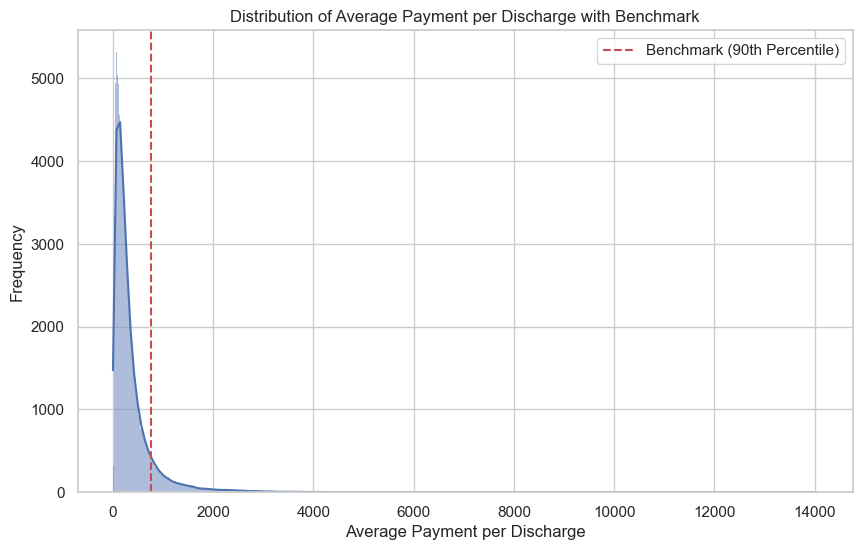

In [20]:
# Creating Average Payment per Discharge
inpatient_data['Average_Payment_per_Discharge'] = inpatient_data['Average Medicare Payments'] / inpatient_data['Total Discharges']

# Setting benchmark for high Average Payment per Discharge (above 90th percentile)
average_payment_per_discharge_threshold = inpatient_data['Average_Payment_per_Discharge'].quantile(0.90)
inpatient_data['High_Payment_per_Discharge_Flag'] = (inpatient_data['Average_Payment_per_Discharge'] > average_payment_per_discharge_threshold).astype(int)

# Visualization of Average Payment per Discharge with Benchmark Line
plt.figure(figsize=(10, 6))
sns.histplot(data=inpatient_data, x='Average_Payment_per_Discharge', kde=True)
plt.axvline(x=average_payment_per_discharge_threshold, color='r', linestyle='--', label='Benchmark (90th Percentile)')
plt.title('Distribution of Average Payment per Discharge with Benchmark')
plt.xlabel('Average Payment per Discharge')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Average Payment per Discharge Takeaways

- The **Average Payment per Discharge** distribution is highly **right-skewed**, with most values being below **\$2,000**. This indicates that, on average, hospitals spend a relatively modest amount per discharge.
- The **90th percentile** is used as a benchmark, indicated by the red dashed line. Hospitals with an **Average Payment per Discharge** above this benchmark may represent unusually high costs per patient discharge, potentially indicating inefficiencies or specialized, high-cost treatments.
- A few hospitals have values exceeding **\$4,000**, indicating a significantly higher payment per discharge, which might require further investigation to understand the reason for these higher costs, such as specialized care requirements or other factors.

This feature, along with its benchmark, is important for identifying hospitals with **high costs per patient discharge**, helping to uncover potential financial inefficiencies or unique cases of high-value treatments.


### Feature 4: Coverage Ratio (Medicare Payments to Total Payments)

The **Coverage Ratio** is calculated as the ratio of `Average Medicare Payments` to `Average Total Payments`. This feature helps evaluate how much of the total payments are covered by Medicare, providing insight into the extent of Medicare's financial coverage for different providers.

**Benchmarking**:
- We use the **10th percentile** to benchmark low `Coverage Ratios`.
- Hospitals with a ratio **below the 10th percentile** will be flagged, as they may indicate a low proportion of payments covered by Medicare, possibly leading to financial strain for patients.


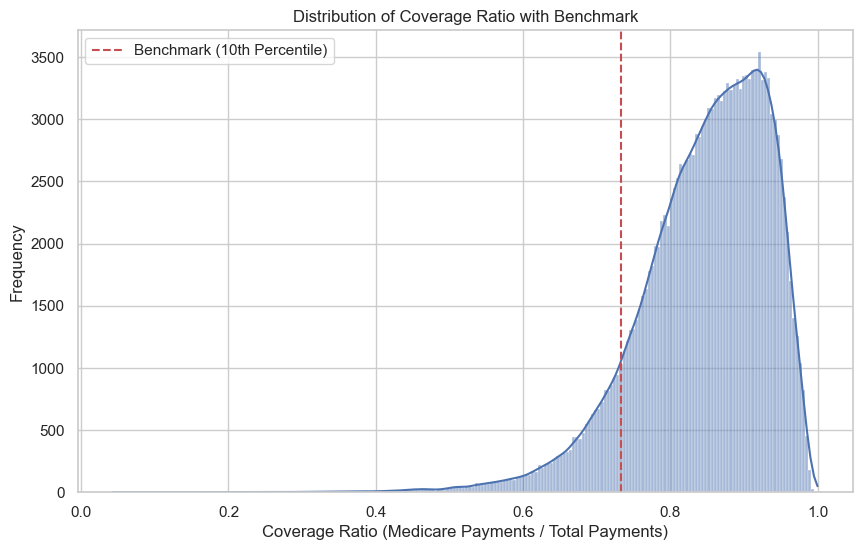

In [21]:
# Creating Coverage Ratio
inpatient_data['Coverage_Ratio'] = inpatient_data['Average Medicare Payments'] / inpatient_data['Average Total Payments']

# Setting benchmark for low Coverage Ratio (below 10th percentile)
coverage_ratio_threshold = inpatient_data['Coverage_Ratio'].quantile(0.10)
inpatient_data['Low_Coverage_Ratio_Flag'] = (inpatient_data['Coverage_Ratio'] < coverage_ratio_threshold).astype(int)

# Visualization of Coverage Ratio with Benchmark Line
plt.figure(figsize=(10, 6))
sns.histplot(data=inpatient_data, x='Coverage_Ratio', kde=True)
plt.axvline(x=coverage_ratio_threshold, color='r', linestyle='--', label='Benchmark (10th Percentile)')
plt.title('Distribution of Coverage Ratio with Benchmark')
plt.xlabel('Coverage Ratio (Medicare Payments / Total Payments)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Coverage Ratio Takeaways

- The **Coverage Ratio** (i.e., `Medicare Payments` to `Total Payments`) generally clusters towards **higher values** close to **1.0**, meaning that Medicare covers the majority of total payments in most cases.
- The distribution is more **left-skewed**, indicating that most hospitals receive almost full coverage of total payments from Medicare, while only a smaller number of hospitals have lower coverage ratios.
- The **benchmark** is set at the **10th percentile** (indicated by the red dashed line), and hospitals with ratios below this benchmark are flagged. These hospitals may be under financial strain due to a lower share of total payments being covered by Medicare.
- Hospitals with **low coverage ratios** could indicate potential **financial challenges** for patients, implying higher out-of-pocket expenses or limited Medicare coverage for services rendered.

This feature is valuable for identifying hospitals where **Medicare coverage** is substantially lower compared to others, which could help focus attention on discrepancies in patient billing and payment policies.



### Feature 5: Discharges per Medicare Payment

The **Discharges per Medicare Payment** feature is calculated as the ratio of `Total Discharges` to `Average Medicare Payments`. This feature provides insight into how efficient a hospital is in discharging patients relative to the payments received from Medicare.

**Benchmarking**:
- We use the **5th percentile** to benchmark low `Discharges per Medicare Payment`.
- Hospitals with values **below the 5th percentile** will be flagged, indicating that they discharge fewer patients per Medicare dollar spent, which may imply inefficiency.


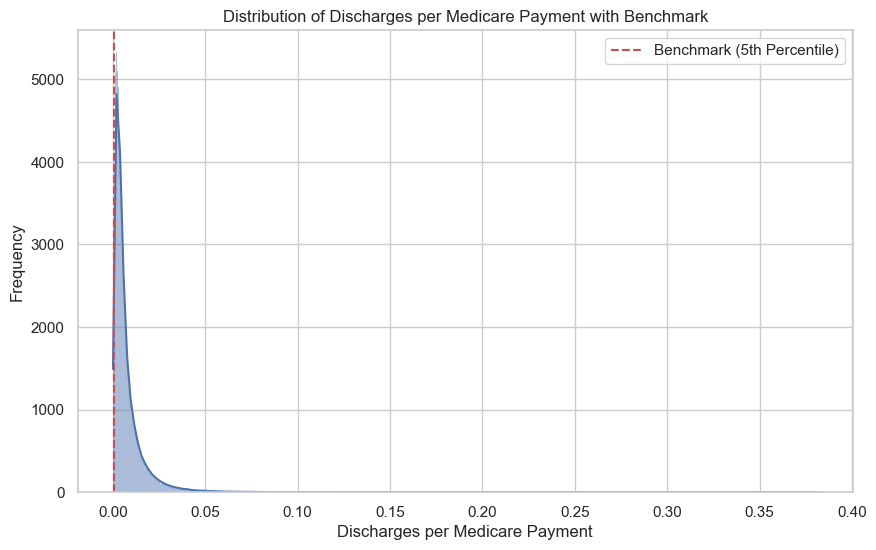

In [22]:
# Creating Discharges per Medicare Payment
inpatient_data['Discharges_per_Medicare_Payment'] = inpatient_data['Total Discharges'] / inpatient_data['Average Medicare Payments']

# Setting benchmark for low Discharges per Medicare Payment (below 5th percentile)
discharges_per_medicare_payment_threshold = inpatient_data['Discharges_per_Medicare_Payment'].quantile(0.05)
inpatient_data['Low_Discharges_per_Medicare_Flag'] = (inpatient_data['Discharges_per_Medicare_Payment'] < discharges_per_medicare_payment_threshold).astype(int)

# Visualization of Discharges per Medicare Payment with Benchmark Line
plt.figure(figsize=(10, 6))
sns.histplot(data=inpatient_data, x='Discharges_per_Medicare_Payment', kde=True)
plt.axvline(x=discharges_per_medicare_payment_threshold, color='r', linestyle='--', label='Benchmark (5th Percentile)')
plt.title('Distribution of Discharges per Medicare Payment with Benchmark')
plt.xlabel('Discharges per Medicare Payment')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Discharges per Medicare Payment Takeaways

- The distribution of **Discharges per Medicare Payment** is heavily **right-skewed**, with most hospitals having a very low value, indicating that there are few discharges per dollar of Medicare payment.
- The **benchmark** has been set at the **5th percentile** (indicated by the red dashed line). Hospitals below this benchmark have a very low efficiency in terms of the number of discharges per Medicare payment.
- Identifying hospitals below the benchmark can help flag institutions that might be providing fewer discharges for each dollar of Medicare payment, potentially pointing to **inefficient use of resources** or unusually high costs per patient discharge.
- This feature can be useful to detect cases where **Medicare expenditures** are high but patient throughput is relatively low, which may indicate financial inefficiencies or discrepancies.



### Feature 6: DRG Definitions with High Variability in Average Covered Charges

In this feature, we aim to identify DRG (Diagnosis-Related Group) definitions that exhibit a high degree of variability in their average covered charges. Charges within a given DRG are expected to be relatively consistent because the DRG represents a specific type of medical condition or procedure. However, significant variability in the average covered charges might suggest potential inconsistencies or even fraudulent activities.

**Steps:**

1. Calculate the standard deviation of the average covered charges for each DRG definition to measure variability.
2. Identify the benchmark for high variability using the 90th percentile as the threshold.
3. Visualize the standard deviation of average covered charges for the top DRGs with the highest variability and highlight the benchmark.



/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/2628218624.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Std Average Covered Charges', y='DRG Definition', data=top_variable_drgs, palette='Blues_d')


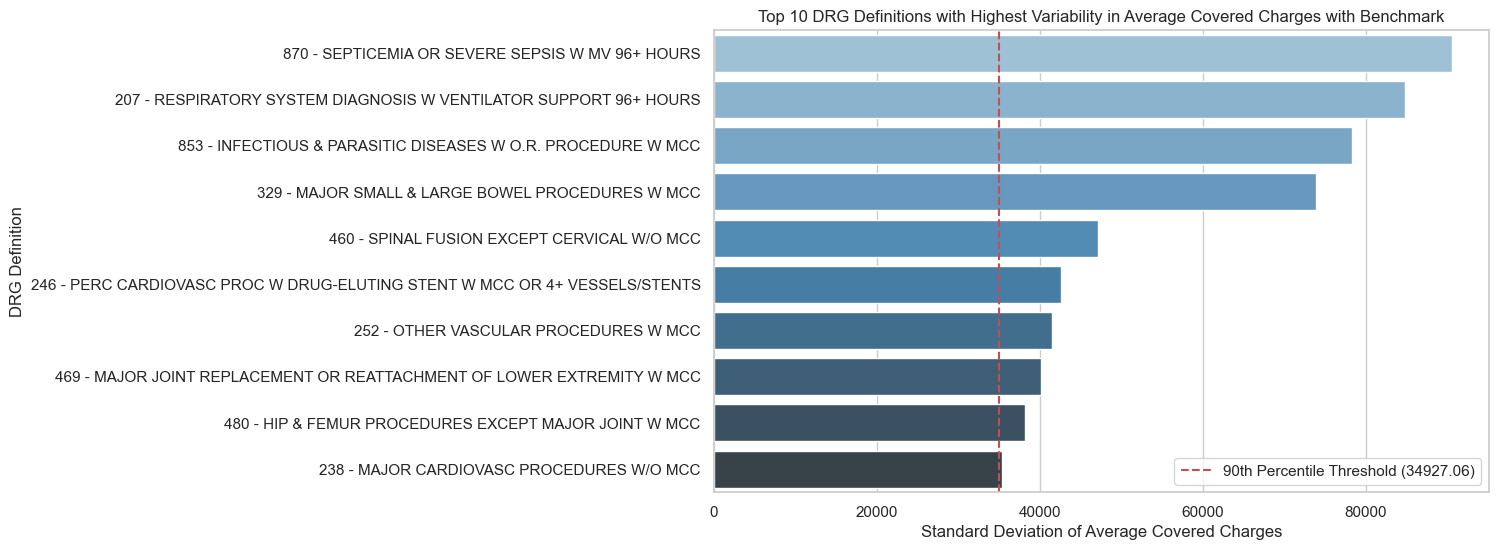

In [23]:
# Calculate the standard deviation of average covered charges for each DRG definition
drg_variability = inpatient_data.groupby('DRG Definition')['Average Covered Charges'].std().reset_index()
drg_variability.columns = ['DRG Definition', 'Std Average Covered Charges']

# Determine the benchmark for high variability - 90th percentile
variability_benchmark = drg_variability['Std Average Covered Charges'].quantile(0.90)

# Filter the top DRGs based on standard deviation of average covered charges
top_variable_drgs = drg_variability.sort_values(by='Std Average Covered Charges', ascending=False).head(10)

# Plot the standard deviation of average covered charges for the top DRGs with benchmark
plt.figure(figsize=(10, 6))
sns.barplot(x='Std Average Covered Charges', y='DRG Definition', data=top_variable_drgs, palette='Blues_d')
plt.axvline(variability_benchmark, color='r', linestyle='--', label=f'90th Percentile Threshold ({variability_benchmark:.2f})')
plt.xlabel('Standard Deviation of Average Covered Charges')
plt.ylabel('DRG Definition')
plt.title('Top 10 DRG Definitions with Highest Variability in Average Covered Charges with Benchmark')
plt.legend()
plt.show()



#### DRG Definitions with High Variability in Average Covered Charges Takeaways

The bar chart highlights the DRG definitions that exhibit the highest variability in their average covered charges, with the 90th percentile threshold for high variability being set at $34,927.06$. Key insights from this visualization include:

1. **Top Variability in Covered Charges**: DRG 870 (Septicemia or Severe Sepsis with MV 96+ Hours) and DRG 207 (Respiratory System Diagnosis with Ventilator Support 96+ Hours) show significantly higher variability compared to the rest. This could be due to the complex nature of the treatments involved, which may lead to a wide range of treatment costs.

2. **Potential Risk Indicators**: The high variability for some DRG definitions, especially those beyond the benchmark, might indicate possible inconsistencies or issues. Variability beyond what is typical for similar medical procedures should be investigated for inconsistencies in billing practices, which could signal potential fraud or operational inefficiencies.

3. **Benchmark Evaluation**: The 90th percentile threshold is effective for identifying DRGs with unusual cost distributions. All the listed DRGs exceed this threshold, implying potential risk for further investigation.

4. **Specialized Treatments**: Some variability may be expected due to the nature of the DRGs, which often include specialized or high-risk procedures. However, consistent outliers with substantial variability should be scrutinized to ensure compliance with standardized billing practices.

Overall, the insights suggest a need for focused auditing and further evaluation of DRG codes with high variability in average covered charges to ensure consistency and identify potential areas for cost reduction or fraud prevention.


### Feature 7: Discharges per Provider Type

In this feature, we aim to analyze the distribution of discharges by provider type to identify any unusual patterns. By examining the discharges per provider type, we can understand whether certain types of providers have significantly higher or lower discharges compared to others. This analysis could potentially help identify fraudulent practices, particularly if specific provider types show unusually high discharges.

#### Steps:
1. **Group Providers by Type**: Categorize providers into `Hospitals`, `Medical Centers`, `Health Services`, and `Others`.
2. **Calculate Average Discharges**: Calculate the average number of discharges for each provider type.
3. **Determine the Benchmark**: Use the 90th percentile as a benchmark to identify unusually high discharge counts.
4. **Visualize the Results**: Create a bar chart to visualize the average discharges per provider type and highlight any values exceeding the benchmark.

Let’s proceed with the implementation. I'll provide the code for this feature below.


/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/2743639947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Discharges', y='Provider Type', data=provider_type_discharge, palette='viridis')


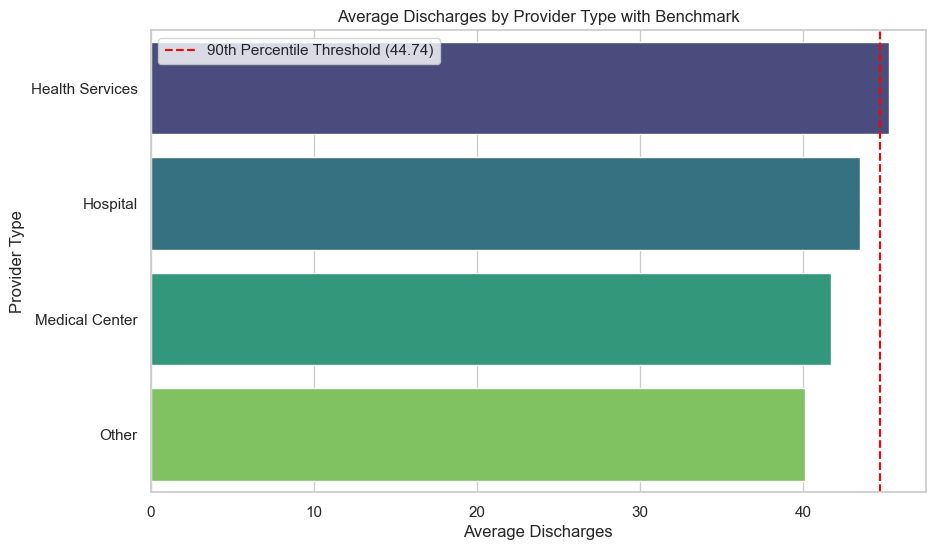

In [24]:
# Group Providers by Type
provider_type_discharge = inpatient_data.groupby('Provider Type')['Total Discharges'].mean().reset_index()

# Determine the benchmark (90th percentile)
discharge_benchmark = np.percentile(provider_type_discharge['Total Discharges'], 90)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Discharges', y='Provider Type', data=provider_type_discharge, palette='viridis')
plt.axvline(discharge_benchmark, color='red', linestyle='--', label=f'90th Percentile Threshold ({discharge_benchmark:.2f})')
plt.xlabel('Average Discharges')
plt.ylabel('Provider Type')
plt.title('Average Discharges by Provider Type with Benchmark')
plt.legend()
plt.show()


#### Discharges per Provider Type Takeaways

- The average discharges for different provider types, such as `Health Services`, `Hospitals`, `Medical Centers`, and `Other`, are generally below the 90th percentile threshold of **44.74**.
- Among the provider types, `Health Services` shows the highest average number of discharges, slightly exceeding the benchmark.
- `Hospitals`, `Medical Centers`, and `Other` provider types are well below the 90th percentile benchmark, indicating that the discharge volume is more consistent across these categories.
- The slight exceedance by `Health Services` may warrant further investigation, as an unusually high discharge count compared to other provider types can be a potential indicator of fraudulent activities or inconsistencies in service practices.

These insights can help focus investigations on provider types that may exhibit unusual discharge volumes, particularly those exceeding the benchmark threshold.


### Feature 8: Average Covered Charge by Provider Type

In this feature, we will analyze the average covered charges across different provider types. This analysis will help us understand which provider types tend to have higher average charges, which can be useful for detecting outliers and possible fraudulent behavior. The focus will be on identifying any significant differences between the provider types, which may indicate unusual charging practices.

**Steps**:
1. Calculate the average covered charges for each provider type (e.g., hospitals, medical centers, health services, etc.).
2. Determine the benchmark for high covered charges by calculating the 90th percentile.
3. Visualize the average covered charges for each provider type and compare them against the benchmark.


/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/9231731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Covered Charges', y='Provider Type', data=provider_type_charges, palette='viridis')


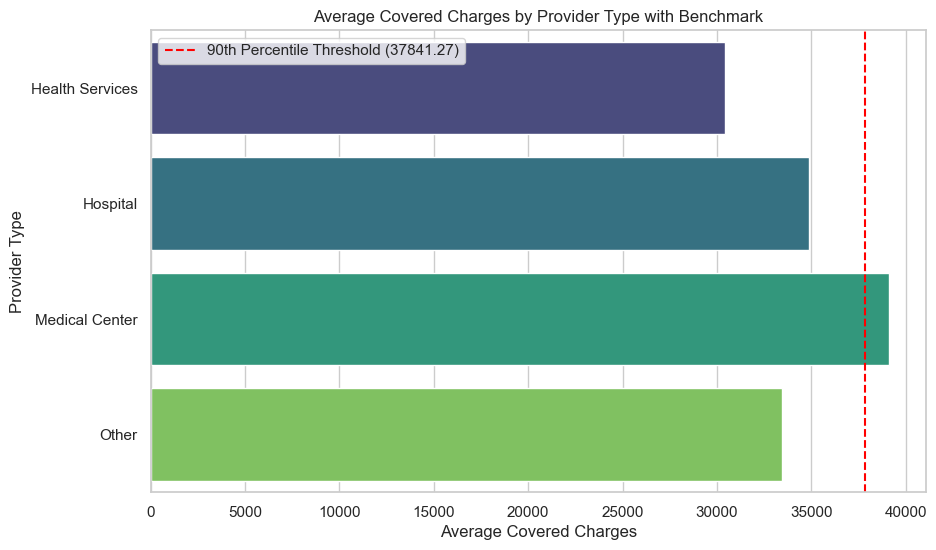

In [25]:
# Calculate the average covered charges by provider type
provider_type_charges = inpatient_data.groupby('Provider Type')['Average Covered Charges'].mean().reset_index()

# Calculate the benchmark using the 90th percentile
charge_threshold = provider_type_charges['Average Covered Charges'].quantile(0.90)

# Plot the average covered charges by provider type with benchmark
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Covered Charges', y='Provider Type', data=provider_type_charges, palette='viridis')
plt.axvline(x=charge_threshold, color='red', linestyle='--', label=f'90th Percentile Threshold ({charge_threshold:.2f})')
plt.title('Average Covered Charges by Provider Type with Benchmark')
plt.legend()
plt.show()


#### Takeaways for Feature 8: Average Covered Charge by Provider Type

The visualization shows the average covered charges across different provider types, with a benchmark set at the 90th percentile (**$37,841.27**). Here are the insights:

- **Medical Centers** stand out as having the highest average covered charges, with values exceeding the benchmark.
- Other provider types such as **Health Services**, **Hospitals**, and **Other** fall below the benchmark.
- The high average charges in **Medical Centers** may indicate a specific pattern or factors leading to consistently higher billing rates, which could warrant a deeper investigation. Potential reasons might include a focus on specialized services or higher-cost treatments, but this needs to be further validated.
- The discrepancy in average covered charges among provider types suggests variability in service costs and possibly billing practices. This variability may be indicative of certain provider types consistently charging more for similar DRGs, which is something worth monitoring for potential inconsistencies or even fraud.



### Feature 9: DRG Frequency by State
This feature aims to determine the frequency of Diagnosis-Related Group (DRG) definitions across different states and identify which states have an unusually high frequency of DRGs. We use the 90th percentile of DRG occurrences as the benchmark to highlight those states exceeding typical frequencies.

Steps:

1. Calculate the frequency of DRGs for each provider state.
2. Determine the benchmark using the 90th percentile for DRG occurrences.
3. Plot the total DRG frequency by state with a benchmark line to identify states exceeding the threshold.

The benchmark will help us identify states that might require further investigation due to a high frequency of DRG definitions, which can be an indicator of potential anomalies.


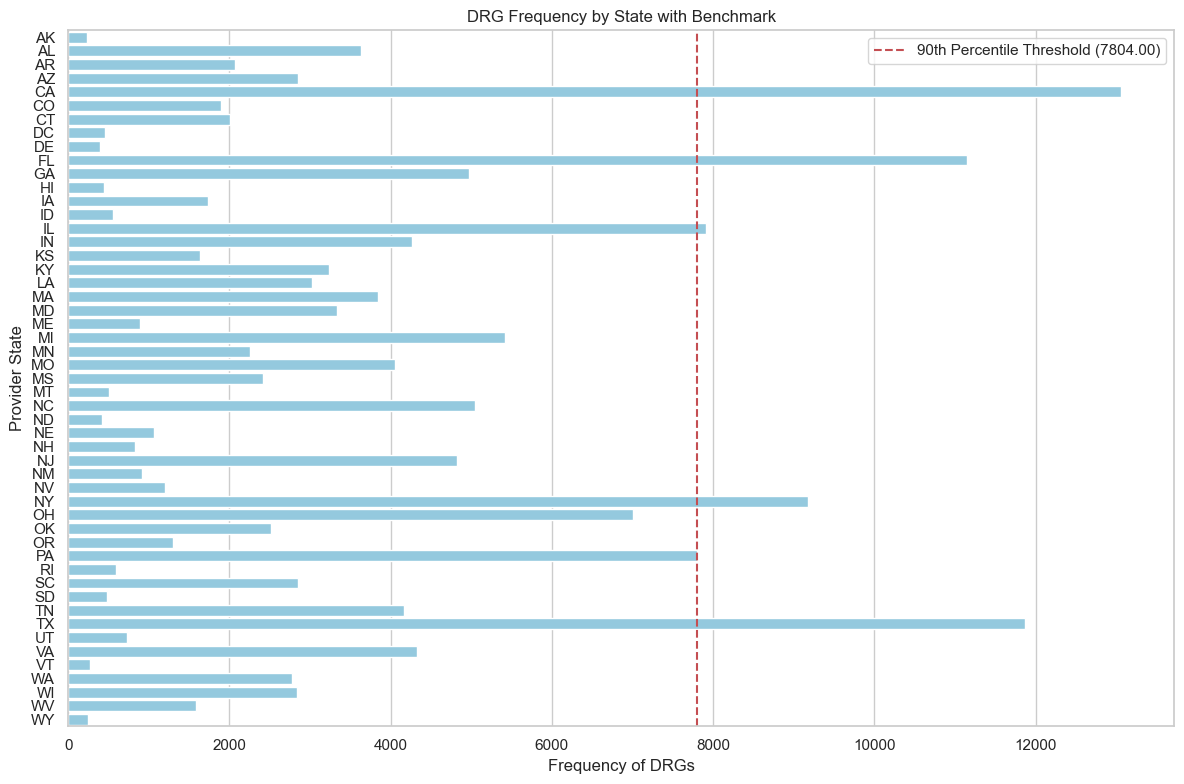

In [26]:
# Step 1: Calculate the frequency of DRGs by state and DRG definition
drg_state_freq = inpatient_data.groupby(['Provider State', 'DRG Definition']).size().reset_index(name='DRG Frequency')

# Step 2: Calculate the total DRG frequency for each state
state_drg_freq = drg_state_freq.groupby('Provider State')['DRG Frequency'].sum().reset_index()

# Step 3: Calculate the 90th percentile threshold for DRG occurrences by state
drg_benchmark = state_drg_freq['DRG Frequency'].quantile(0.9)

# Step 4: Plotting the total DRG frequencies by state
plt.figure(figsize=(12, 8))
sns.barplot(x='DRG Frequency', y='Provider State', data=state_drg_freq, color='skyblue')
plt.axvline(drg_benchmark, color='r', linestyle='--', label=f'90th Percentile Threshold ({drg_benchmark:.2f})')
plt.title('DRG Frequency by State with Benchmark')
plt.xlabel('Frequency of DRGs')
plt.ylabel('Provider State')
plt.legend()
plt.tight_layout()
plt.show()


### DRG Frequency by State Takeaways
From the bar plot showing the frequency of Diagnosis-Related Group (DRG) definitions across different states, with a benchmark set at the 90th percentile:

1. **High DRG Frequency States**: States such as **California (CA)**, **Florida (FL)**, and **Texas (TX)** have a significantly higher frequency of DRG definitions compared to other states, exceeding the 90th percentile threshold of **7,804**. These states warrant further examination as the high frequency might be an indicator of unusually high medical activity that could either suggest potential inconsistencies in the reporting or be an area of focus for healthcare resource allocation.

2. **Distribution Insights**: The visualization shows that only a few states surpass the 90th percentile benchmark, while the majority have frequencies well below the threshold. This may indicate a concentration of healthcare services in a limited number of states, possibly due to population density, availability of specialized hospitals, or different state-level healthcare policies.

3. **Potential Anomalies**: The states surpassing the threshold, especially with significant margins, may require further investigation to determine if there are inconsistencies or abnormalities in how DRGs are being recorded. This could also point to potential overuse of certain DRG categories that might be linked to fraud or improper billing practices.

4. **Healthcare Centralization**: The disparity in DRG frequencies suggests possible centralization of healthcare services in some regions. This centralization may impact the quality and availability of healthcare in states that are below the benchmark, signaling disparities in access to healthcare services across the country.

These insights can help prioritize investigations or direct attention towards areas where anomalies are observed, aiding in risk management and fraud detection efforts.


### Feature 10: Outlier Detection in Average Covered Charges and Medicare Payments for Common DRGs

In this feature, we focus on detecting outliers in the average covered charges and average Medicare payments for the most common DRGs (Diagnosis-Related Groups). By identifying anomalies among the most frequently occurring DRGs, we can detect potential issues such as pricing irregularities or fraudulent activity.

#### Steps:

1. **Identify Common DRGs**: 
   - We start by identifying the top 10 common DRGs by frequency. This helps us target procedures or diagnoses that have sufficient data to provide meaningful insights.

2. **Aggregate Data**:
   - For each DRG and provider, we calculate the average covered charges and average Medicare payments.
   - To simplify the visualization, we extract only the first three digits of each DRG definition to represent it as a "DRG Code". A separate legend is also created for reference.

3. **Detect Outliers Using IQR**:
   - The Interquartile Range (IQR) method is used to detect outliers:
     - **Q1** (25th percentile) and **Q3** (75th percentile) are calculated.
     - **IQR** is the difference between **Q3** and **Q1**.
     - The lower and upper bounds for outlier detection are set at **Q1 - 1.5 * IQR** and **Q3 + 1.5 * IQR**, respectively.
     - Values that lie beyond these bounds are classified as outliers.

4. **Visualization**:
   - We use box plots to visualize the distributions of average covered charges and average Medicare payments across the common DRGs, highlighting the outliers.
   - The x-axis represents the simplified DRG codes, while the y-axis shows the average covered charges and average Medicare payments.

5. **Legend for DRG Codes**:
   - To aid interpretation, a legend mapping DRG codes to their full definitions is provided below the visualizations.

This feature aims to identify anomalies in covered charges and Medicare payments, which could potentially indicate fraudulent or irregular billing practices.


/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/1051441268.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DRG Code', y='Average Covered Charges', data=common_drgs_grouped, palette='Set2')


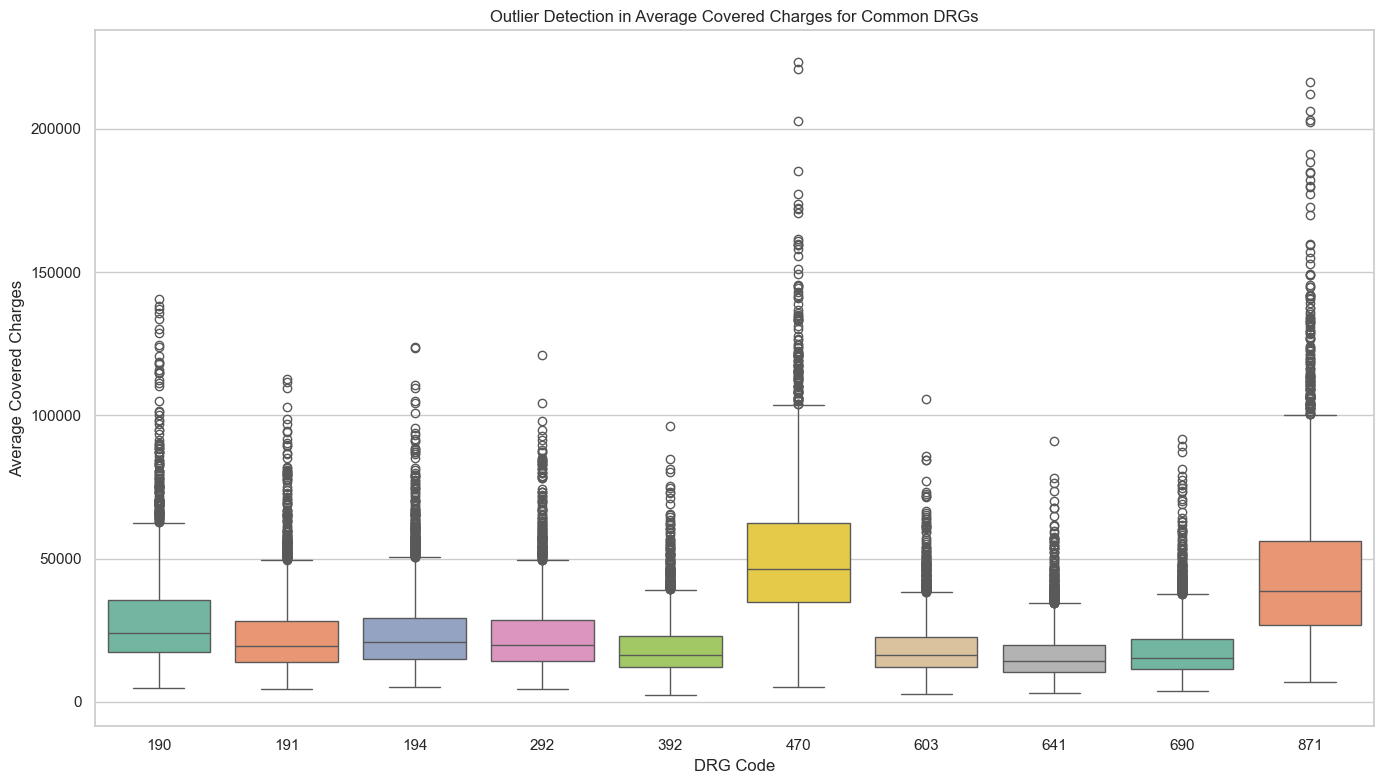

/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_86970/1051441268.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DRG Code', y='Average Medicare Payments', data=common_drgs_grouped, palette='Set3')


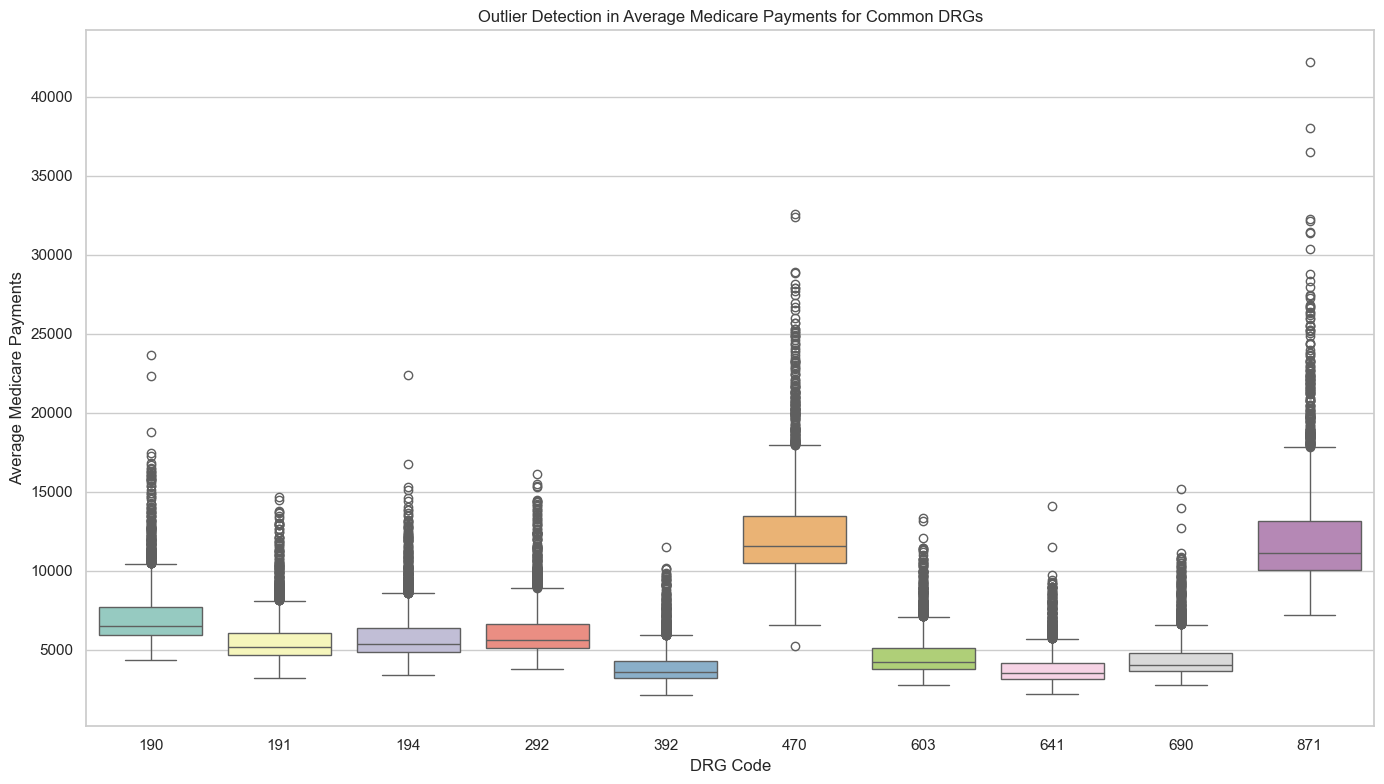

,DRG Code,DRG Definition
0,190,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC
2713,191,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC
5433,194,194 - SIMPLE PNEUMONIA & PLEURISY W CC
8456,292,292 - HEART FAILURE & SHOCK W CC
11409,392,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS..."
14359,470,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...
17109,603,603 - CELLULITIS W/O MCC
19916,641,"641 - MISC DISORDERS OF NUTRITION,METABOLISM,F..."
22815,690,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC
25804,871,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...


In [27]:
# Step 1: Identify the top 10 common DRGs by frequency
common_drgs = inpatient_data['DRG Definition'].value_counts().nlargest(10).index.tolist()

# Filter the dataset to include only the common DRGs
common_drgs_data = inpatient_data[inpatient_data['DRG Definition'].isin(common_drgs)]

# Step 2: Calculate the average covered charges and average Medicare payments for each DRG and provider
common_drgs_grouped = common_drgs_data.groupby(['DRG Definition', 'Provider Id']).agg({
    'Average Covered Charges': 'mean',
    'Average Medicare Payments': 'mean'
}).reset_index()

# Extracting the first 3 digits from DRG Definitions for simplicity
common_drgs_grouped['DRG Code'] = common_drgs_grouped['DRG Definition'].str.extract(r'^(\d{3})')

# Step 3: Detect outliers using the Interquartile Range (IQR) method
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers for Average Covered Charges
outliers_covered_charges = detect_outliers_iqr(common_drgs_grouped, 'Average Covered Charges')

# Detect outliers for Average Medicare Payments
outliers_medicare_payments = detect_outliers_iqr(common_drgs_grouped, 'Average Medicare Payments')

# Step 4: Visualization

# Plotting outliers for Average Covered Charges
plt.figure(figsize=(14, 8))
sns.boxplot(x='DRG Code', y='Average Covered Charges', data=common_drgs_grouped, palette='Set2')
plt.title('Outlier Detection in Average Covered Charges for Common DRGs')
plt.tight_layout()
plt.show()

# Plotting outliers for Average Medicare Payments
plt.figure(figsize=(14, 8))
sns.boxplot(x='DRG Code', y='Average Medicare Payments', data=common_drgs_grouped, palette='Set3')
plt.title('Outlier Detection in Average Medicare Payments for Common DRGs')
plt.tight_layout()
plt.show()

# Create a legend for DRG codes and their descriptions
drg_legend = common_drgs_grouped[['DRG Code', 'DRG Definition']].drop_duplicates()
display(drg_legend)

#### Outlier Detection in Covered Charges/Payments for Common DRGs Takeaways

- **Boxplots for Common DRGs**: The boxplots above represent the distribution of average covered charges and Medicare payments for the top 10 most common DRG codes. Each DRG code on the x-axis is accompanied by a corresponding DRG definition in the legend.
  
- **Outliers and Variability**: 
  - All of the DRG categories show a large number of outliers. Notably, DRG codes `470` and `871` exhibit the most significant variability, with numerous values beyond the upper whisker of the box plot. This suggests that these DRGs have greater discrepancies in charges/payments, potentially indicating inconsistencies or anomalies.
  
  - The presence of many outliers across DRGs, especially in covered charges, implies that certain providers may be charging significantly more for the same procedure compared to others. This could be an indication of overcharging or fraud.

- **Difference in Distributions**:
  - The spread (interquartile range) for average covered charges is wider for DRG code `470` and `871`, indicating that for this DRG, providers are charging vastly different amounts for the same medical condition.
  - Similarly, For average Medicare payments, DRG `470` and `871` show the largest number of outliers, indicating inconsistency in reimbursement.

- **Use of Benchmarking**:
  - The interquartile range (IQR) method was used to identify and flag the outliers in both covered charges and Medicare payments. Providers that fall significantly outside this range warrant further investigation.

These insights can help in focusing audit efforts on specific DRGs and providers, especially those consistently showing high variability or many outliers, potentially pointing to fraudulent billing practices or overcharging.


### Feature 11: Category-Specific Outliers

This feature focuses on detecting potential anomalies in the dataset by examining hospitals’ performance within their DRG categories. Specifically, we look at two key metrics: the charge-to-payment ratio and discharge efficiency. For each hospital, we will calculate how much these metrics deviate from the average within their DRG category using z-scores.

Hospitals with unusually high or low z-scores might indicate anomalous practices such as overcharging, inefficiency, or underpayment. By flagging such outliers, we can target cases that require further investigation for potential fraud or irregularities.

**Rationale:**

- **Charge-to-Payment Ratio:** A hospital significantly overcharging compared to others in the same DRG category could suggest exploitative billing practices.
- **Discharge Efficiency:** Hospitals with extremely high or low costs per discharge within a category may indicate inefficiencies or non-standard practices.

By identifying category-specific outliers, we can better understand which hospitals deviate from the norm in their respective procedures, leading to more targeted fraud detection.

**Note:**
The DRG categories are read from a separate file and joined with the inpatient dataset to group the hospitals into their respective categories. This allows us to analyze performance within specific DRG groups.


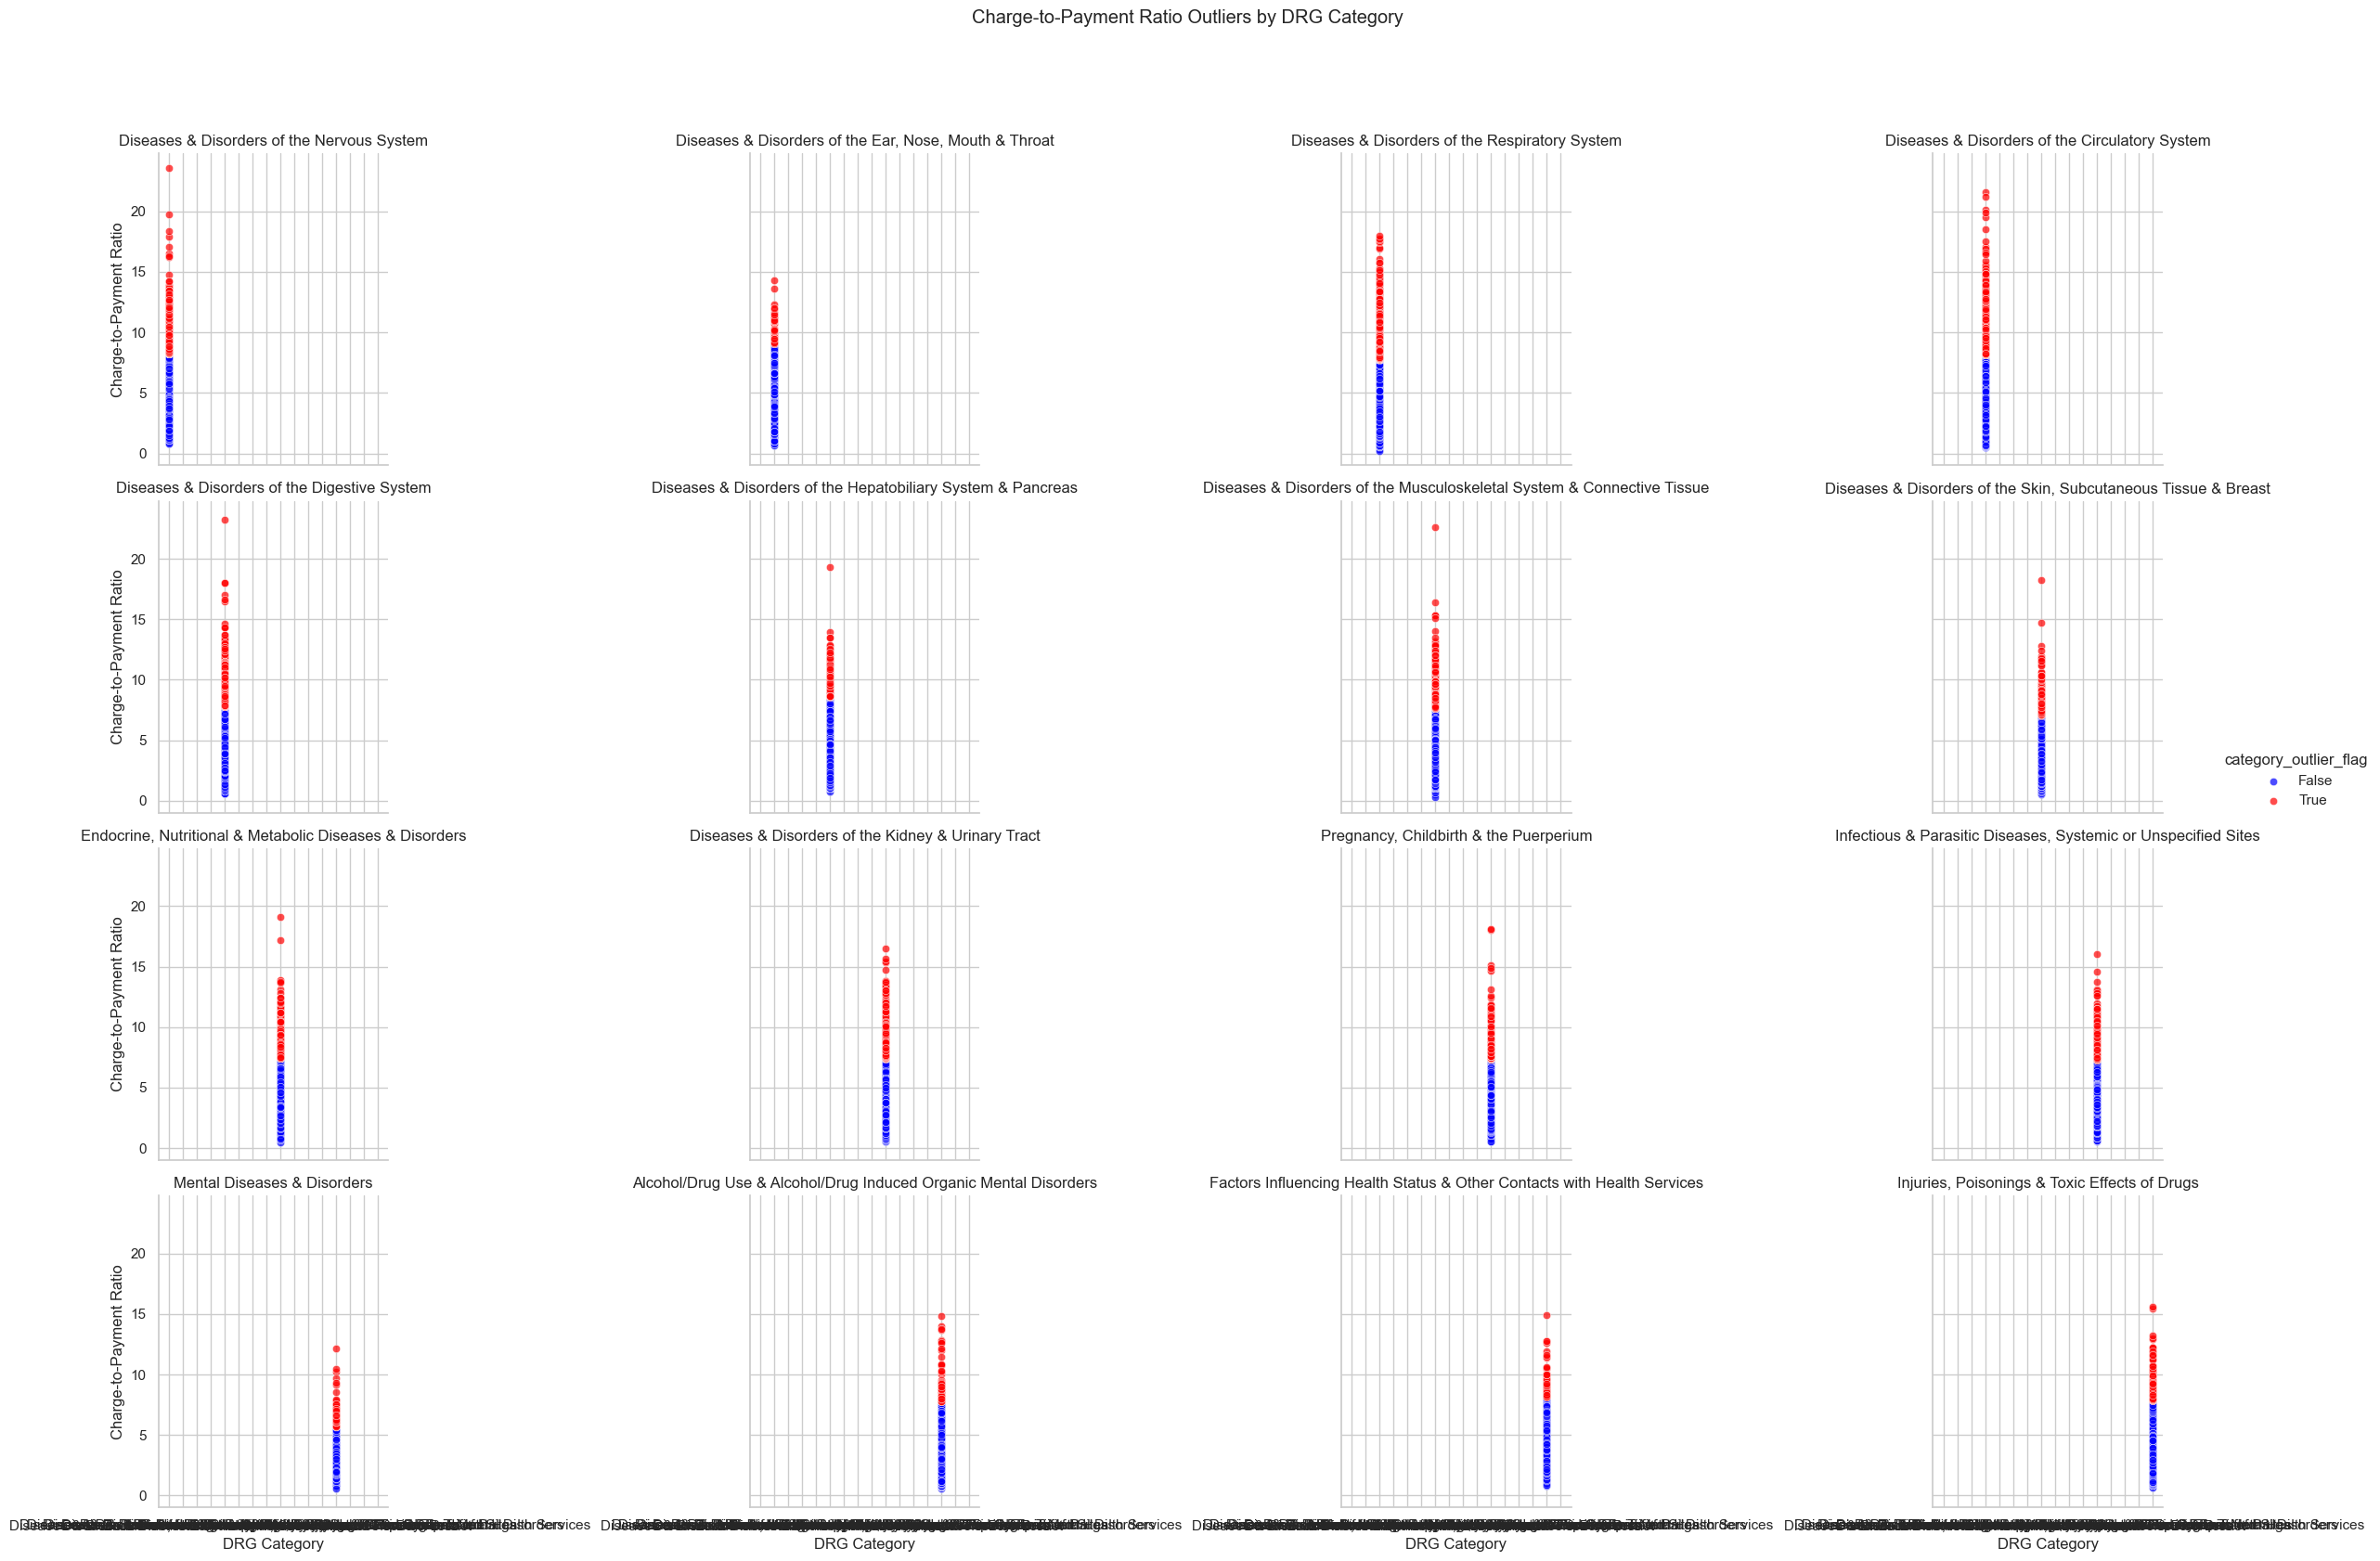

In [28]:
from scipy import stats

# Read the DRG categories dataset
drg_categories = pd.read_csv('/Users/dave.john.98/Desktop/APAN/Fall 24/Anomaly Detection/Week 5/DRG_Categories.csv')

# Create a dictionary of DRG ranges and their categories
drg_categories.columns = ['DRG Range', 'Category']
drg_ranges_dict = {row['DRG Range']: row['Category'] for _, row in drg_categories.iterrows()}

# Function to map DRG codes to categories
def map_drg_to_category(drg_code, drg_ranges):
    drg_code = int(drg_code.split(' - ')[0])
    for drg_range, category in drg_ranges.items():
        drg_start, drg_end = map(int, drg_range.split('-'))
        if drg_start <= drg_code <= drg_end:
            return category
    return None

# Map DRG codes in the inpatient_data to their corresponding categories
inpatient_data['DRG Category'] = inpatient_data['DRG Definition'].apply(lambda x: map_drg_to_category(x, drg_ranges_dict))

# Calculate charge-to-payment ratio
inpatient_data['charge_to_payment_ratio'] = inpatient_data['Average Covered Charges'] / inpatient_data['Average Total Payments']

# Calculate discharge efficiency (Average Covered Charges per Total Discharge)
inpatient_data['discharge_efficiency'] = inpatient_data['Average Covered Charges'] / inpatient_data['Total Discharges']

# Group by DRG Category and calculate z-scores for charge-to-payment ratio and discharge efficiency
inpatient_data['charge_to_payment_z'] = inpatient_data.groupby('DRG Category')['charge_to_payment_ratio'].transform(lambda x: stats.zscore(x, nan_policy='omit'))
inpatient_data['discharge_efficiency_z'] = inpatient_data.groupby('DRG Category')['discharge_efficiency'].transform(lambda x: stats.zscore(x, nan_policy='omit'))

# Calculate the IQR for charge-to-payment ratio within each DRG category
Q1 = inpatient_data.groupby('DRG Category')['charge_to_payment_ratio'].transform(lambda x: x.quantile(0.25))
Q3 = inpatient_data.groupby('DRG Category')['charge_to_payment_ratio'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

# Define outliers as those that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
inpatient_data['category_outlier_flag'] = (inpatient_data['charge_to_payment_ratio'] < (Q1 - 1.5 * IQR)) | (inpatient_data['charge_to_payment_ratio'] > (Q3 + 1.5 * IQR))

# Facet grid to plot each DRG category separately for clearer visuals
g = sns.FacetGrid(inpatient_data, col="DRG Category", col_wrap=4, height=4, aspect=1.5, hue='category_outlier_flag', palette={True: 'red', False: 'blue'}, legend_out=True)
g.map(sns.scatterplot, 'DRG Category', 'charge_to_payment_ratio', alpha=.7)

# Add legend and adjust plot settings
g.add_legend()
g.set_axis_labels("DRG Category", "Charge-to-Payment Ratio")
g.set_titles("{col_name}")
g.fig.suptitle('Charge-to-Payment Ratio Outliers by DRG Category', y=1.05)
plt.tight_layout()
plt.show()

#### Takeaways from Charge-to-Payment Ratio Outliers by DRG Category

1. **High Proportion of Outliers**: A significant proportion of hospitals within each DRG category are being flagged as outliers (red points), suggesting that the charge-to-payment ratio varies widely within these categories. This may indicate that the underlying billing practices or cost structures differ greatly between hospitals, even within the same DRG category.

2. **Possible Explanation**:
    - The charge-to-payment ratio may naturally have high variability due to regional differences, hospital sizes, or treatment complexities that aren’t fully accounted for in the DRG grouping.
    - It's also possible that the thresholds (IQR bounds) for detecting outliers may be too tight for this type of data, resulting in a larger number of flagged cases.

3. **Categories with Particularly High Outlier Count**:
    - **Diseases & Disorders of the Nervous System** and **Diseases & Disorders of the Circulatory System** have a high number of hospitals flagged as outliers. This suggests wide variability in the financial practices within these categories, which warrants further exploration.
    - Similarly, **Pregnancy, Childbirth & the Puerperium** shows a high concentration of outliers, indicating substantial variation in costs across hospitals.

4. **Reevaluation of Anomaly Detection**: The high number of flagged cases suggests that the current IQR-based anomaly detection method may need further tuning. Using a different approach (e.g., log transformation or adjusting the IQR threshold) or applying more sophisticated anomaly detection methods (such as robust


### Feature 12: Log-Transformed Hospital Efficiency Score

This feature calculates an efficiency score for each hospital based on its ability to provide services at a lower cost relative to the number of discharges it handles. The score is log-transformed to better handle the wide range of values and reduce skewness, allowing for clearer comparisons between hospitals. The goal is to identify hospitals that may have inefficiencies in their operations, leading to higher-than-expected costs.

**Rationale:**
- **Total Discharges**: A hospital with more discharges should, in theory, have better economies of scale, resulting in lower costs per discharge.
- **Covered Charges**: By comparing the average covered charges per discharge, we can identify hospitals with disproportionately high costs. A high cost per discharge could signal inefficiencies in service delivery or potential overcharging.

The log transformation helps normalize the distribution of efficiency scores, making it easier to identify outliers and trends. This feature will highlight hospitals that are operating efficiently versus those that might be inflating costs, which could be indicative of fraudulent activity or operational inefficiencies.

**Why Log Transformation?**
- The log transformation was applied to compress the wide range of efficiency scores and reduce the impact of extreme values. This ensures that hospitals with extremely high costs do not dominate the analysis and that patterns across the majority of hospitals are easier to interpret.


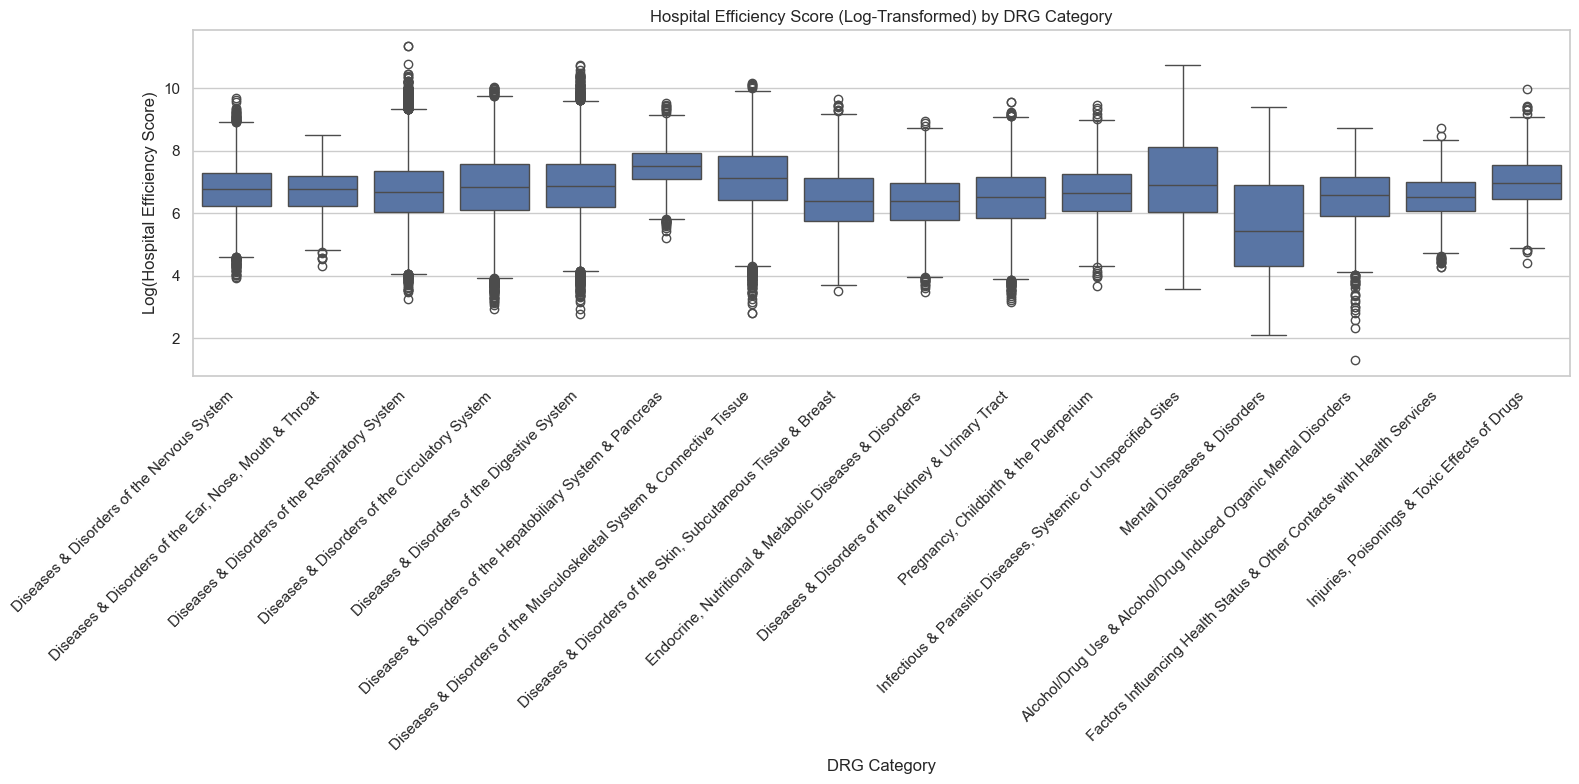

In [29]:
# Calculate the hospital efficiency score (Covered Charges per Discharge)
inpatient_data['hospital_efficiency_score'] = inpatient_data['Average Covered Charges'] / inpatient_data['Total Discharges']

# Apply log transformation to the hospital efficiency score to reduce skewness
inpatient_data['log_hospital_efficiency_score'] = np.log1p(inpatient_data['hospital_efficiency_score'])

# Visualize the log-transformed hospital efficiency score by DRG category using a box plot
plt.figure(figsize=(16, 8))
sns.boxplot(x='DRG Category', y='log_hospital_efficiency_score', data=inpatient_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot title and labels
plt.title('Hospital Efficiency Score (Log-Transformed) by DRG Category')
plt.xlabel('DRG Category')
plt.ylabel('Log(Hospital Efficiency Score)')

# Display the plot with adjusted layout
plt.tight_layout()
plt.show()


#### Takeaways from Log-Transformed Hospital Efficiency Score by DRG Category

1. **General Trends**:
    - The log-transformed efficiency scores show relatively consistent ranges for most DRG categories, with median values clustered around the middle of the distribution. This indicates that most hospitals have comparable efficiency, with a few notable exceptions.

2. **Categories with Higher Median Scores**:
    - **Infectious & Parasitic Diseases, Systemic or Unspecified Sites** and **Mental Diseases & Disorders** categories have visibly higher median efficiency scores compared to others. This suggests that hospitals in these categories tend to have higher costs per discharge, even after accounting for the log transformation. This could point to specific complexities in these categories, but further investigation may be needed to explain these elevated costs.

3. **Lower Median Scores**:
    - **Diseases & Disorders of the Ear, Nose, Mouth & Throat** and **Diseases & Disorders of the Respiratory System** have lower median efficiency scores, indicating that hospitals in these categories tend to have lower costs per discharge relative to others. The relatively narrow range of values within these categories suggests consistent efficiency across hospitals.

4. **Outliers**:
    - Despite the log transformation, many DRG categories still exhibit outliers, particularly in the upper range of efficiency scores. These outliers could represent hospitals that have disproportionately high costs per discharge, which might indicate inefficiencies or irregular billing practices.
    - **Infectious & Parasitic Diseases** and **Diseases & Disorders of the Circulatory System** show some of the most prominent outliers, signaling potential anomalies in cost management within these categories.

5. **Tighter Ranges**:
    - Some categories, such as **Diseases & Disorders of the Skin, Subcutaneous Tissue & Breast** and **Diseases & Disorders of the Kidney & Urinary Tract**, show tighter interquartile ranges. This indicates that hospitals in these categories have more consistent efficiency scores, with fewer extreme outliers.

6. **Actionable Insights**:
    - Hospitals that fall significantly above the median efficiency score for each DRG category should be investigated further. These outliers may signal inefficiencies or overcharging relative to their peers. Targeting these hospitals for a deeper review could help uncover opportunities for cost reductions or fraud detection.
    - The consistency in some categories suggests efficient operation, whereas others with wider score distributions may benefit from operational reviews to identify why certain hospitals are experiencing higher-than-expected costs.



In [30]:
inpatient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 30 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

In [31]:
drg_variability

,DRG Definition,Std Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,15941.252284
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,14085.285681
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,29593.224629
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,16732.402767
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12606.452706
...,...,...
95,885 - PSYCHOSES,14305.274967
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,11150.914810
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,24737.866749
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,9606.776465


In [32]:
# Save inpatient_data to a CSV file
inpatient_data.to_csv('inpatient_data.csv', index=False)